In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import plotly.express as px

In [210]:
df=pd.read_csv(r"C:\Users\Dell\lybrate project\finalcopy_304_305_gynecologist_complete_cleaning.csv")
df

Unnamed: 0                    Name Specialization  Experience (in years)  \
0             0       Dr. Sindhuri Kapu  Gynaecologist                   13.0   
1             1  Dr. Juhul Arvind Patel  Gynaecologist                    8.0   
2             2             Dr. Paipuru  Gynaecologist                    0.0   
3             3       Dr M Swapna Reddy  Gynaecologist                   17.0   
4             4        Dr. Sadhvi Reddy  Gynaecologist                   14.0   
..          ...                     ...            ...                    ...   
688         695            Dr. Nivedita  Gynaecologist                   25.0   
689         696             Dr. Neelima  Gynaecologist                   28.0   
690         697            Anusha Patel  Gynaecologist                   14.0   
691         698     Dr. Manjula Anagani  Gynaecologist                   33.0   
692         699      Dr. K Padmaja Devi  Gynaecologist                   33.0   

                                             Education  Fee at clinic  \
0                  MBBS, DNB - Obstetrics & Gynecology          800.0   
1    DNB, DGO, Dip. Hospital Administration, Diplom...          500.0   
2                                        Not Mentioned          500.0   
3                                            MBBS, DGO          500.0   
4    Fellowship  In Minimal Access Surgery, MS - Ob...          500.0   
..                                                 ...            ...   
688                MBBS, MD - Obstetrics & Gynaecology          500.0   
689  MBBS, MD - Obstetrics & Gynaecology, Fellowshi...          500.0   
690                                       MBBS, MS OBG          300.0   
691  MBBS, Internship, MD (Pathology), MD (Gynaecol...          500.0   
692                                          MBBS, DGO          450.0   

     Online Fee                                        Clinic Name  \
0         500.0  Ankura Hospital for Women & Children - Banjara...   
1         300.0                                       Pristyn Care   
2         300.0                                Pristyn Care Clinic   
3         300.0                                       Pristyn care   
4         500.0                                     Vijay Hospital   
..          ...                                                ...   
688       300.0                Srishti Women's CLinic    (On Call)   
689       300.0                                   Neelima Hospital   
690       300.0                               Habsiguda Polyclinic   
691       300.0                                            Unknown   
692       300.0                                      Sneha Clinics   

              Area Available From Available Till       City  Total Fee  \
0        Hyderabad       10:00:00       18:00:00  Hyderabad       1300   
1        Hyderabad       10:00:00       20:00:00  Hyderabad        800   
2    Banjara Hills       17:00:00       20:00:00  Hyderabad        500   
3        Hyderabad       09:00:00       18:30:00  Hyderabad        500   
4     Dilsukhnagar       11:00:00       17:00:00  Hyderabad       1000   
..             ...            ...            ...        ...        ...   
688        Tarnaka       10:00:00       17:00:00  Hyderabad        500   
689     Moti Nagar       10:00:00       14:00:00  Hyderabad        500   
690      Hyderabad       17:00:00       20:00:00  Hyderabad        600   
691        Unknown       11:00:00       13:00:00  Hyderabad        800   
692           KPHB       09:00:00       13:30:00  Hyderabad        450   

    Number of Hrs. Available  
0                      08:00  
1                      10:00  
2                      03:00  
3                      09:30  
4                      06:00  
..                       ...  
688                    07:00  
689                    04:00  
690                    03:00  
691                    02:00  
692                    04:30  

[693 rows x 14 columns]

In [3]:
df.shape

(693, 14)

In [4]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} is Categorical")
    elif df[col].dtype.kind in 'bifc':
        print(f"{col} is Numerical")
    else:
        print(f"{col} is of type {df[col].dtype}")

Unnamed: 0 is Numerical
Name is Categorical
Specialization is Categorical
Experience (in years) is Numerical
Education is Categorical
Fee at clinic is Numerical
Online Fee is Numerical
Clinic Name is Categorical
Area is Categorical
Available From is Categorical
Available Till is Categorical
City is Categorical
Total Fee is Numerical
Number of Hrs. Available is Categorical


In [5]:
df.drop(columns='Unnamed: 0',inplace= True)

In [6]:
df

Name Specialization  Experience (in years)  \
0         Dr. Sindhuri Kapu  Gynaecologist                   13.0   
1    Dr. Juhul Arvind Patel  Gynaecologist                    8.0   
2               Dr. Paipuru  Gynaecologist                    0.0   
3         Dr M Swapna Reddy  Gynaecologist                   17.0   
4          Dr. Sadhvi Reddy  Gynaecologist                   14.0   
..                      ...            ...                    ...   
688            Dr. Nivedita  Gynaecologist                   25.0   
689             Dr. Neelima  Gynaecologist                   28.0   
690            Anusha Patel  Gynaecologist                   14.0   
691     Dr. Manjula Anagani  Gynaecologist                   33.0   
692      Dr. K Padmaja Devi  Gynaecologist                   33.0   

                                             Education  Fee at clinic  \
0                  MBBS, DNB - Obstetrics & Gynecology          800.0   
1    DNB, DGO, Dip. Hospital Administration, Diplom...          500.0   
2                                        Not Mentioned          500.0   
3                                            MBBS, DGO          500.0   
4    Fellowship  In Minimal Access Surgery, MS - Ob...          500.0   
..                                                 ...            ...   
688                MBBS, MD - Obstetrics & Gynaecology          500.0   
689  MBBS, MD - Obstetrics & Gynaecology, Fellowshi...          500.0   
690                                       MBBS, MS OBG          300.0   
691  MBBS, Internship, MD (Pathology), MD (Gynaecol...          500.0   
692                                          MBBS, DGO          450.0   

     Online Fee                                        Clinic Name  \
0         500.0  Ankura Hospital for Women & Children - Banjara...   
1         300.0                                       Pristyn Care   
2         300.0                                Pristyn Care Clinic   
3         300.0                                       Pristyn care   
4         500.0                                     Vijay Hospital   
..          ...                                                ...   
688       300.0                Srishti Women's CLinic    (On Call)   
689       300.0                                   Neelima Hospital   
690       300.0                               Habsiguda Polyclinic   
691       300.0                                            Unknown   
692       300.0                                      Sneha Clinics   

              Area Available From Available Till       City  Total Fee  \
0        Hyderabad       10:00:00       18:00:00  Hyderabad       1300   
1        Hyderabad       10:00:00       20:00:00  Hyderabad        800   
2    Banjara Hills       17:00:00       20:00:00  Hyderabad        500   
3        Hyderabad       09:00:00       18:30:00  Hyderabad        500   
4     Dilsukhnagar       11:00:00       17:00:00  Hyderabad       1000   
..             ...            ...            ...        ...        ...   
688        Tarnaka       10:00:00       17:00:00  Hyderabad        500   
689     Moti Nagar       10:00:00       14:00:00  Hyderabad        500   
690      Hyderabad       17:00:00       20:00:00  Hyderabad        600   
691        Unknown       11:00:00       13:00:00  Hyderabad        800   
692           KPHB       09:00:00       13:30:00  Hyderabad        450   

    Number of Hrs. Available  
0                      08:00  
1                      10:00  
2                      03:00  
3                      09:30  
4                      06:00  
..                       ...  
688                    07:00  
689                    04:00  
690                    03:00  
691                    02:00  
692                    04:30  

[693 rows x 13 columns]

# **<center>Univariate Analysis for Numeric Data</center>**

## **Experience Column**

In [9]:
df['Experience (in years)'].describe()

count    693.000000
mean      24.454545
std       11.736252
min        0.000000
25%       16.000000
50%       23.000000
75%       33.000000
max       61.000000
Name: Experience (in years), dtype: float64

## Histogram Plot

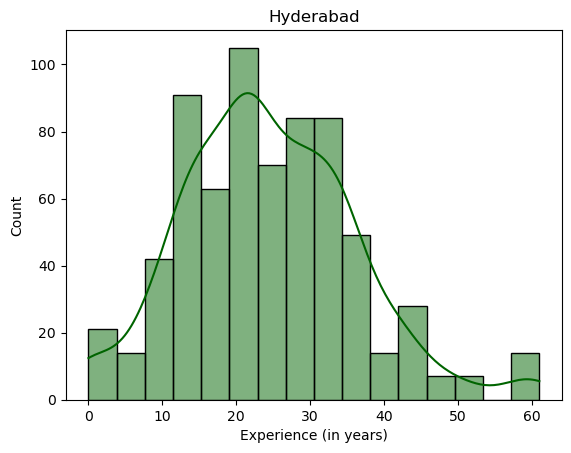

In [11]:
#  histogram with kde = True for numerical col (experience in years)
sns.histplot(data=df["Experience (in years)"], kde = True,color = 'darkgreen')
plt.title('Hyderabad')
plt.show()

- From the above Histogram plot there are :
1. highest number of doctors with between 20-30 years of experience
2. lowest number of doctors with greater than 55 years of experience

## Count Plot

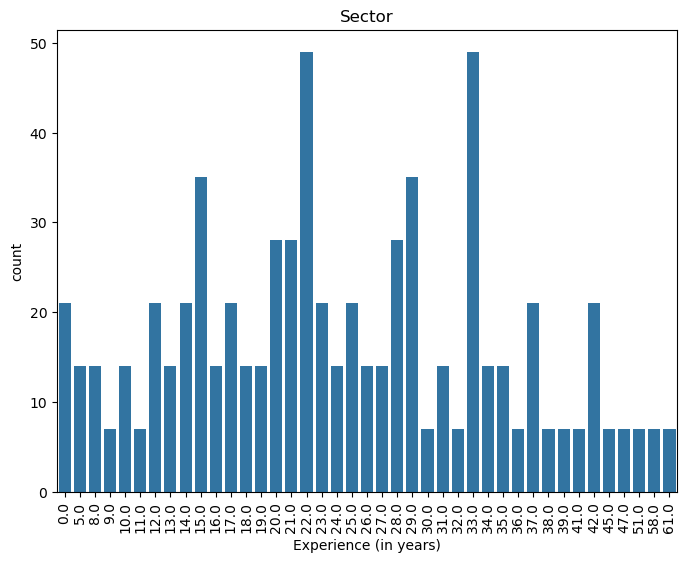

In [14]:
plt.figure(figsize=[8,6])
plt.title('Sector')
sns.countplot(x='Experience (in years)', data=df)
plt.ylabel('count')
plt.xlabel('Experience (in years)')
plt.xticks(rotation=90)
plt.show()

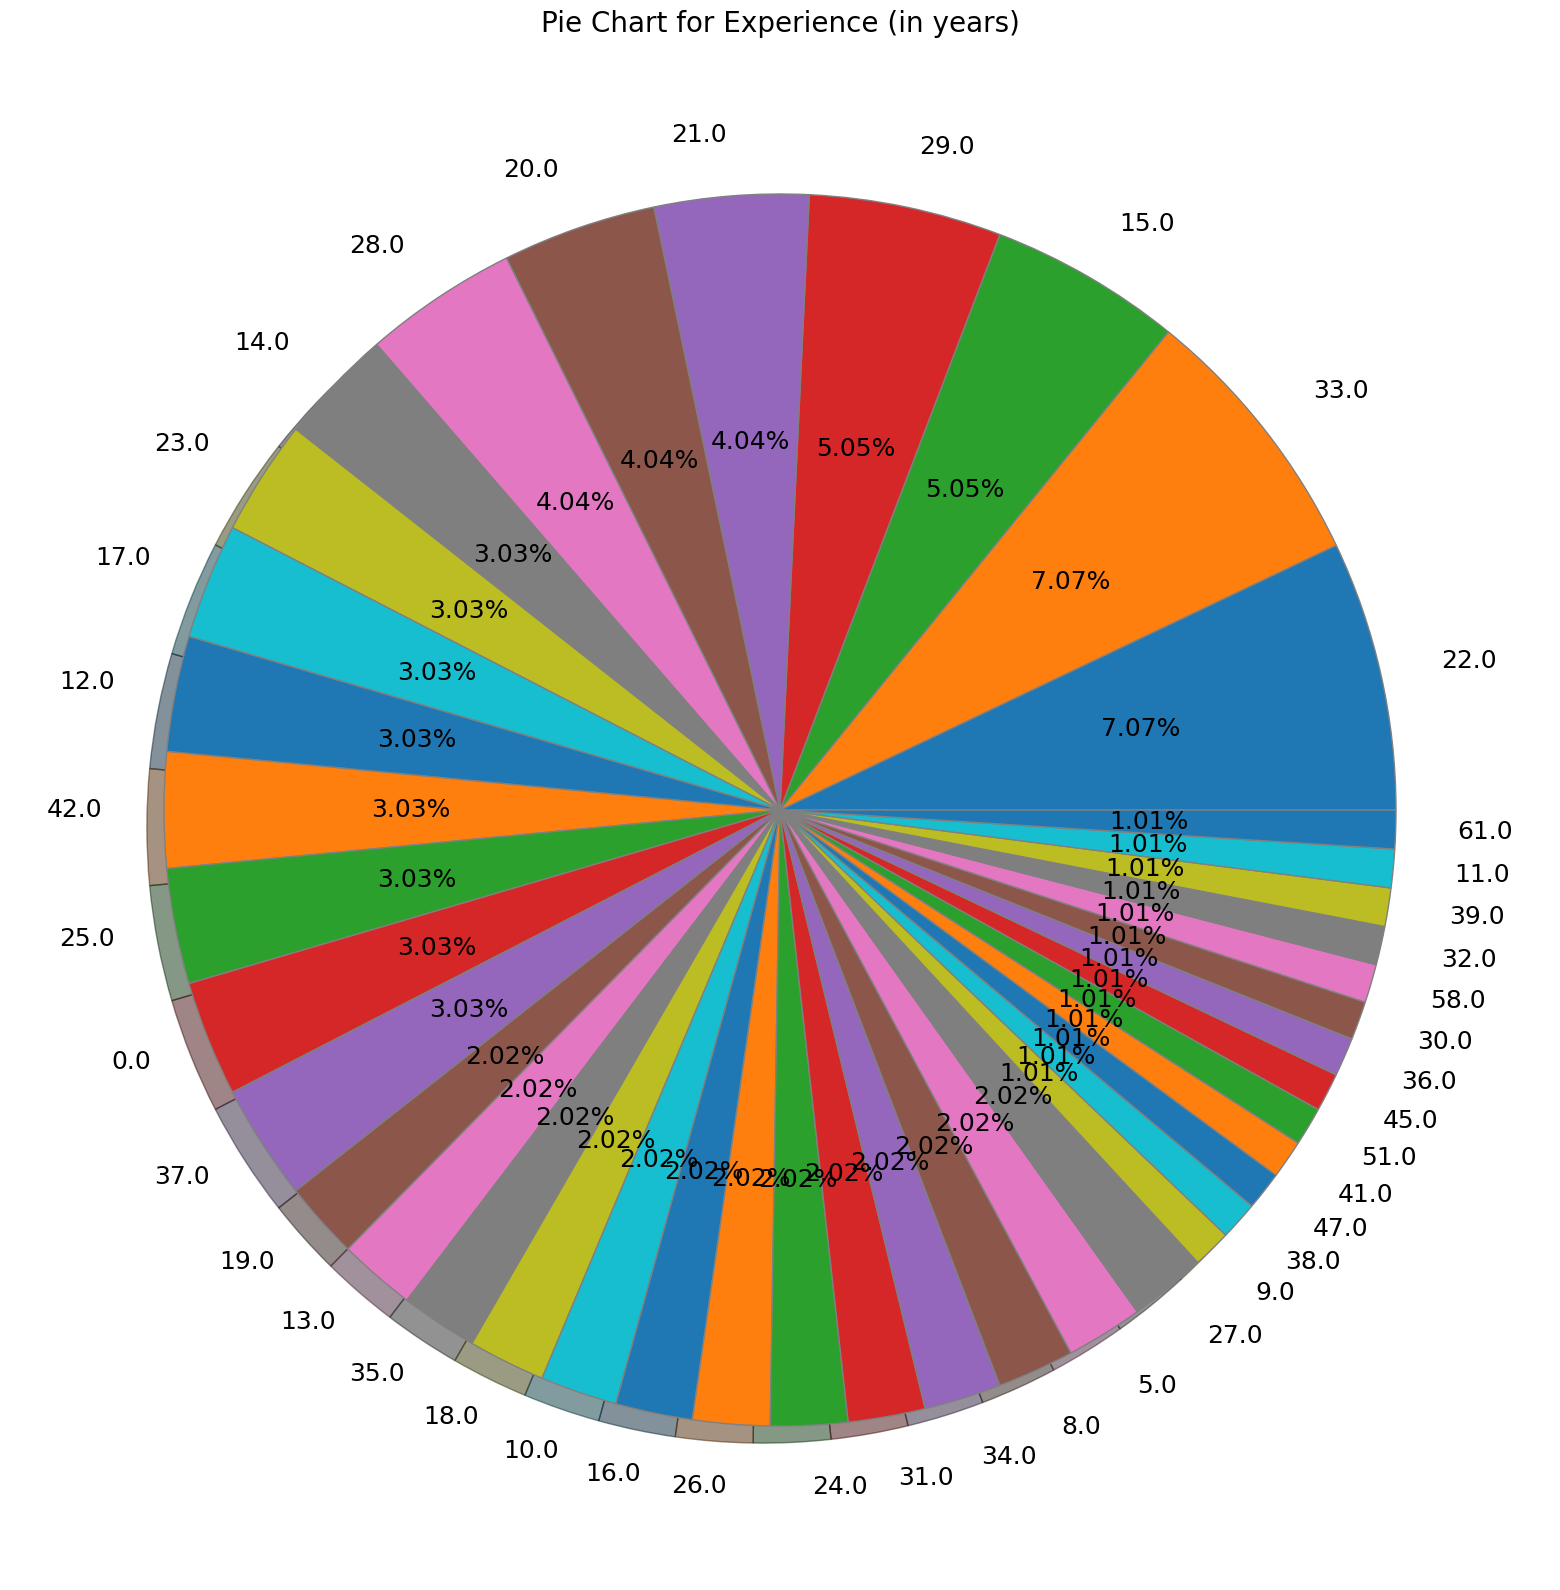

In [15]:
plt.figure(figsize=(20,20))
plt.pie(data=df, x=df["Experience (in years)"].value_counts().values, 
        labels=df["Experience (in years)"].value_counts().index, 
        autopct="%0.2f%%", wedgeprops={"edgecolor":"grey"}, 
        textprops={'fontsize': 18},  # Increase font size to 24
        shadow=True)
plt.title("Pie Chart for Experience (in years)", fontsize=20)  # Increase title font size to 30
plt.show()

<Axes: title={'center': 'Violinplot of Experience in Years'}, xlabel='Fee at clinic in Rupees', ylabel='count'>

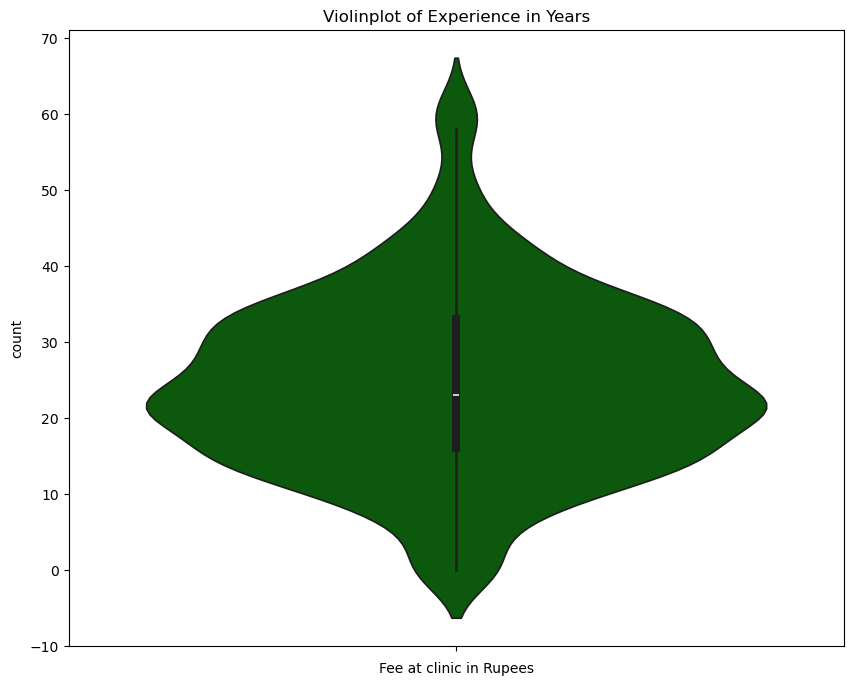

In [16]:
plt.figure(figsize=(10,8))
plt.title('Violinplot of Experience in Years')
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.violinplot(data=df["Experience (in years)"], color = 'darkgreen')

<Axes: title={'center': 'Hyderabad'}, xlabel='Experience (in years)'>

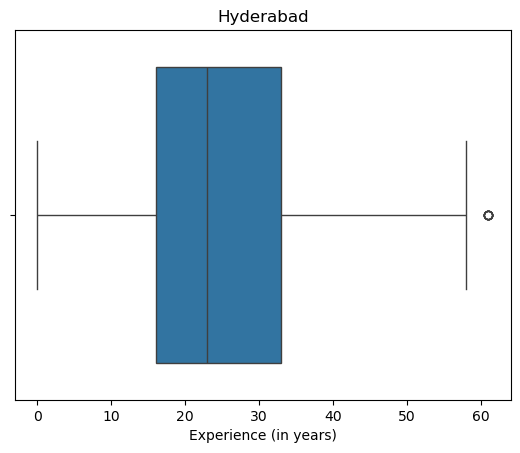

In [17]:
# boxplot
plt.title('Hyderabad')
sns.boxplot(x=df["Experience (in years)"])

- From the box plot there are outliers in the experience columns, which is data is right skewed

## **Fee at Clinic**

<Axes: title={'center': 'Histogram plot of Fee at clinic in ranges'}, xlabel='Fee at clinic in Rupees', ylabel='count'>

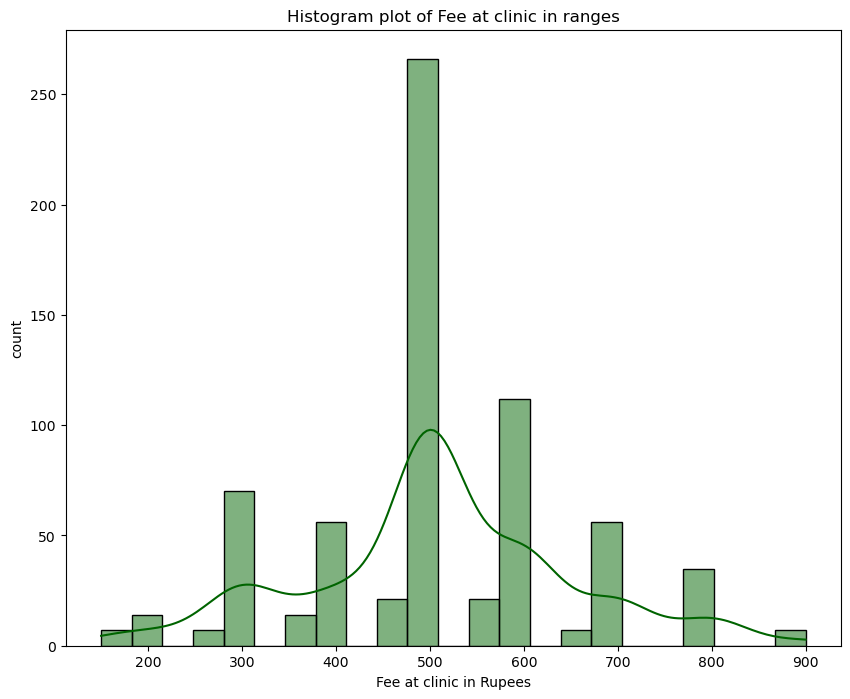

In [20]:
plt.figure(figsize=(10,8))
plt.title('Histogram plot of Fee at clinic in ranges')
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.histplot(data=df["Fee at clinic"], kde = True, color = 'darkgreen')

In [21]:
df['Fee at clinic'].max()

900.0

In [22]:
df['Fee at clinic'].min()

150.0

In [23]:
df['Fee at clinic'].mean()

509.5959595959596

In [24]:
total = (df['Fee at clinic'].max()),(df['Fee at clinic'].min()),(df['Fee at clinic'].mean())

In [25]:
total

(900.0, 150.0, 509.5959595959596)

- From the histogram plot large number of `fee at clinic` are Maximum Amount is 900, Minimum Amount is 150, and Average is 150

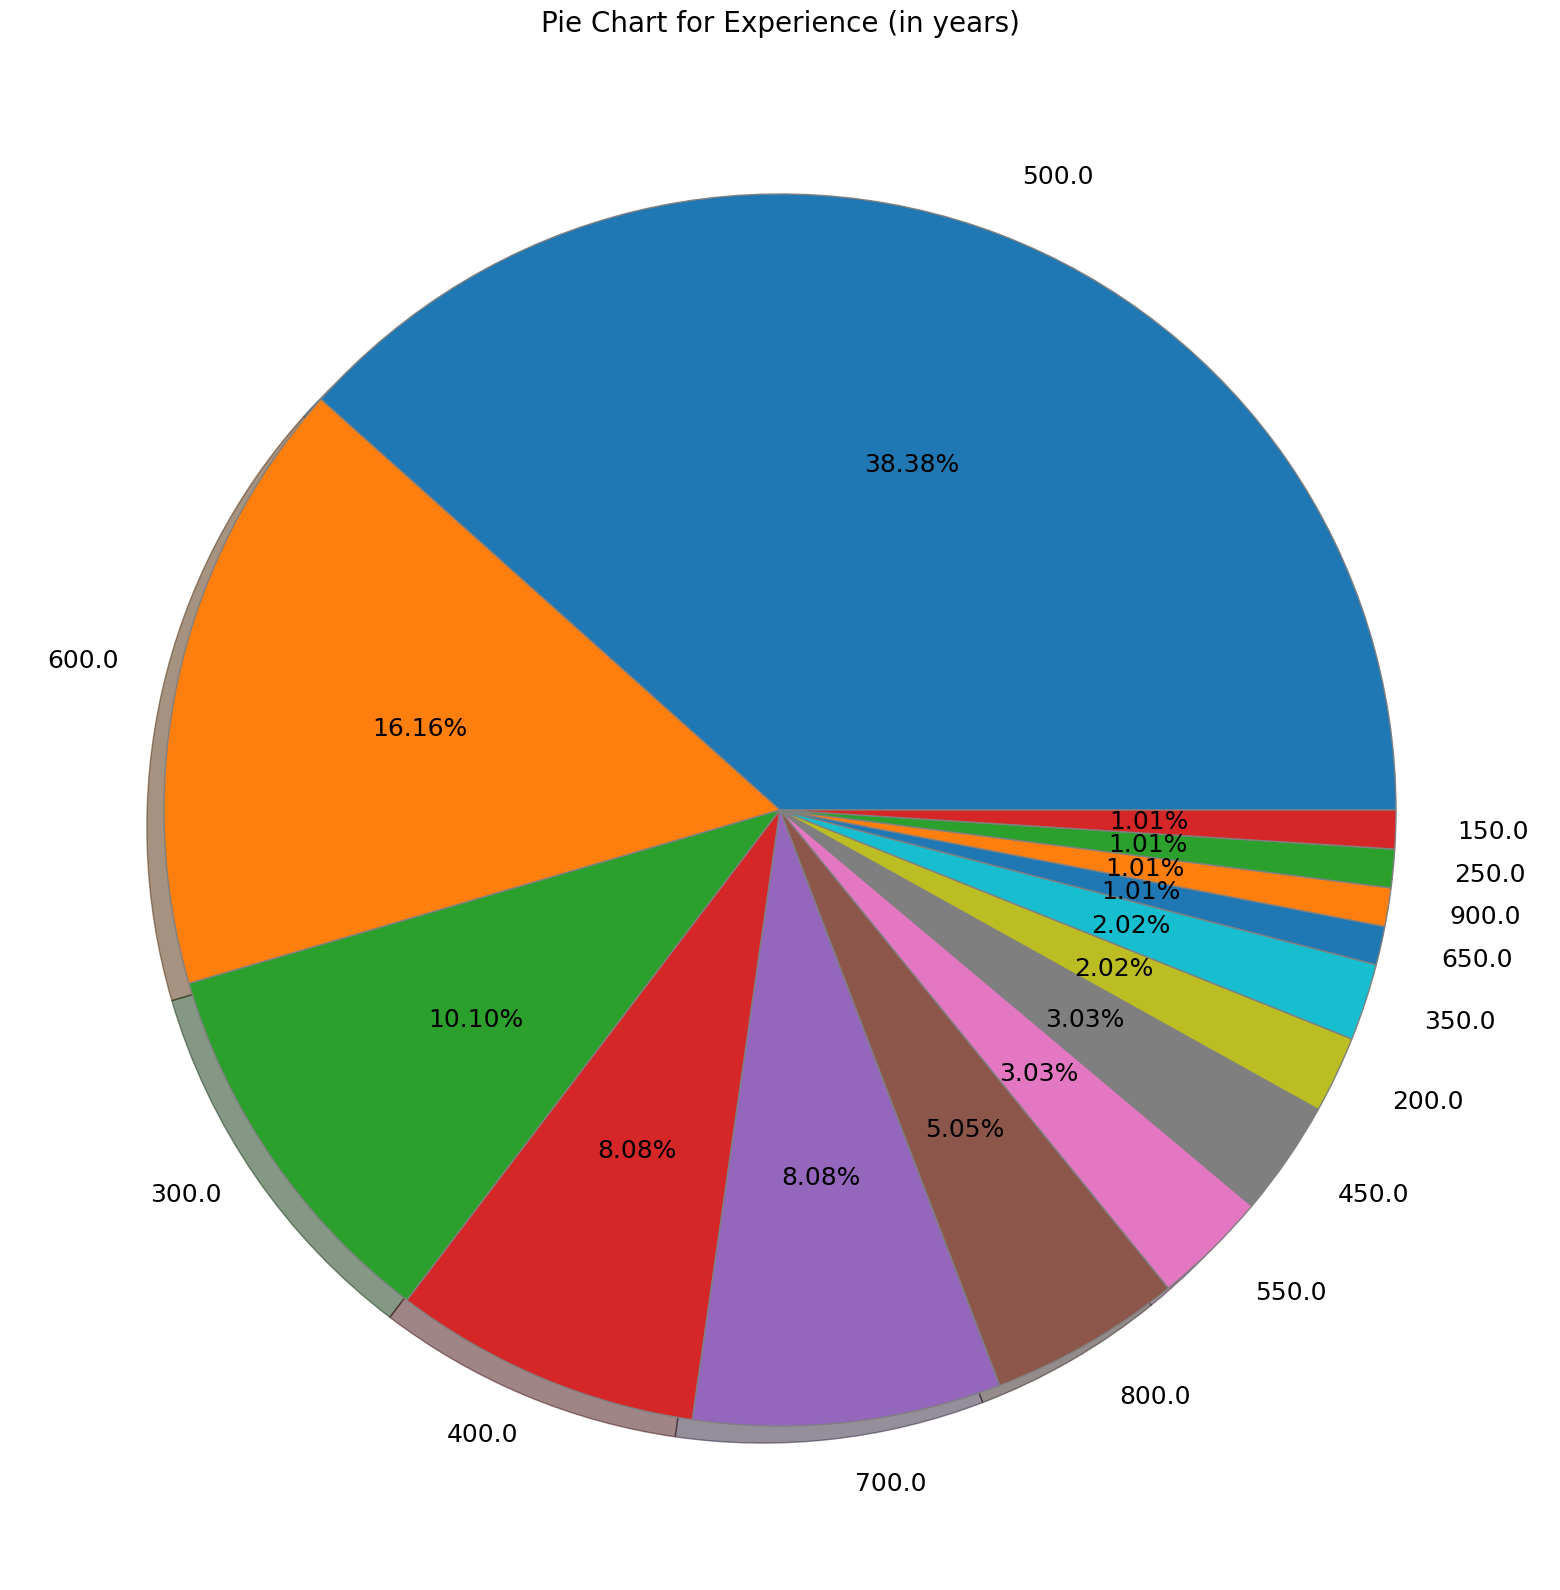

In [27]:
plt.figure(figsize=(20,20))
plt.pie(data=df, x=df["Fee at clinic"].value_counts().values, 
        labels=df["Fee at clinic"].value_counts().index, 
        autopct="%0.2f%%", wedgeprops={"edgecolor":"grey"}, 
        textprops={'fontsize': 18},  # Increase font size to 24
        shadow=True)
plt.title("Pie Chart for Experience (in years)", fontsize=20)  # Increase title font size to 30
plt.show()

<Axes: title={'center': 'Stripplot of Fee at clinic in ranges'}, xlabel='Fee at clinic in Rupees', ylabel='count'>

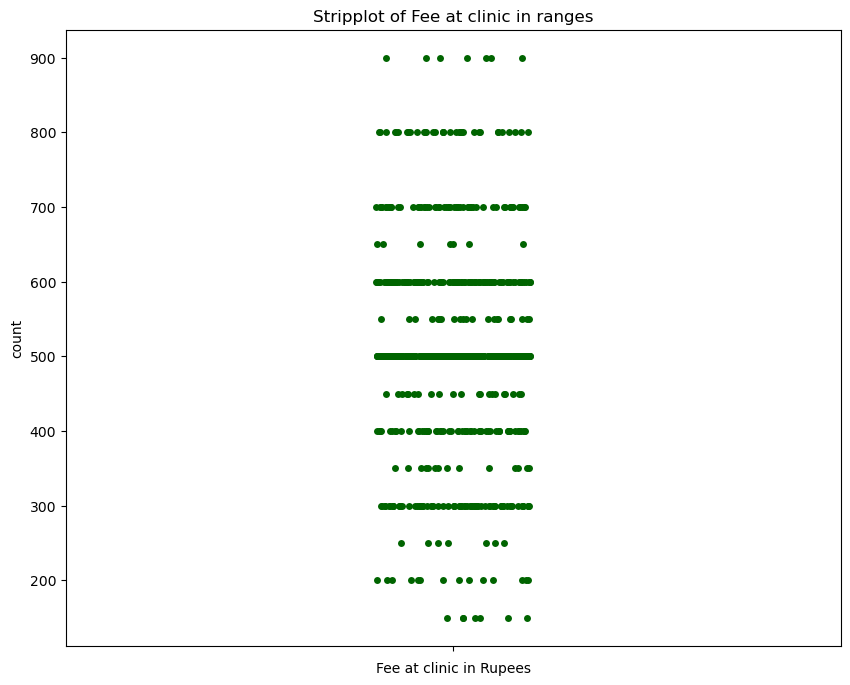

In [28]:
plt.figure(figsize=(10,8))
plt.title('Stripplot of Fee at clinic in ranges')
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.stripplot(data=df["Fee at clinic"], color = 'darkgreen')

<Axes: title={'center': 'Violinplot of Fee at clinic in ranges'}, xlabel='Fee at clinic in Rupees', ylabel='count'>

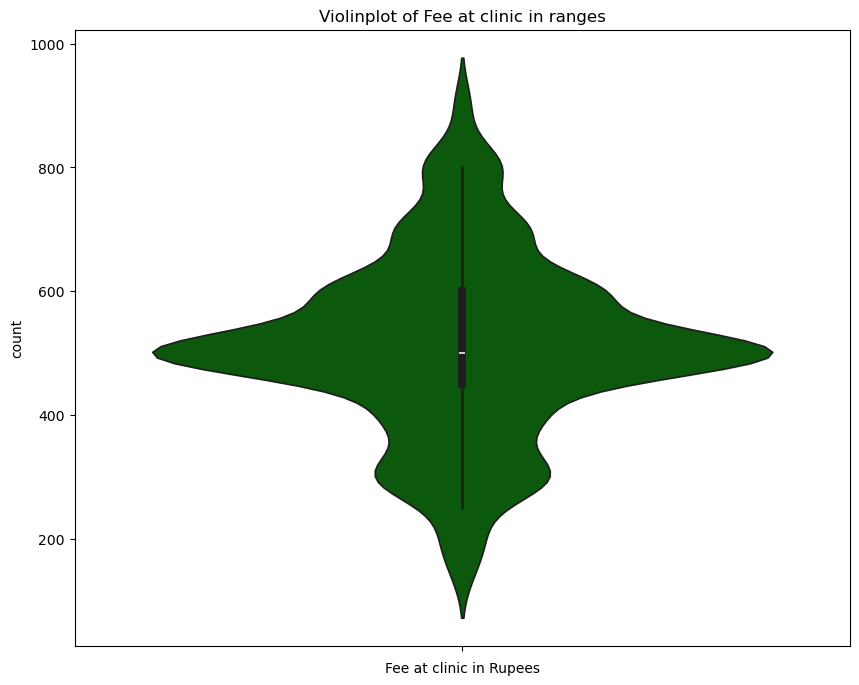

In [29]:
plt.figure(figsize=(10,8))
plt.title('Violinplot of Fee at clinic in ranges')
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.violinplot(data=df["Fee at clinic"], color = 'darkgreen')

<Axes: xlabel='Fee at clinic'>

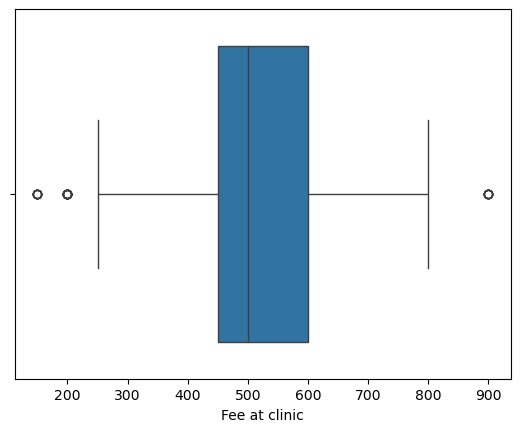

In [30]:
sns.boxplot(x=df["Fee at clinic"])

- There are very few outliers are there in the Fee at clinic 
    - above upper boundary (900) of right skewed and above upper boundary(150-250) left skewed  

## Education

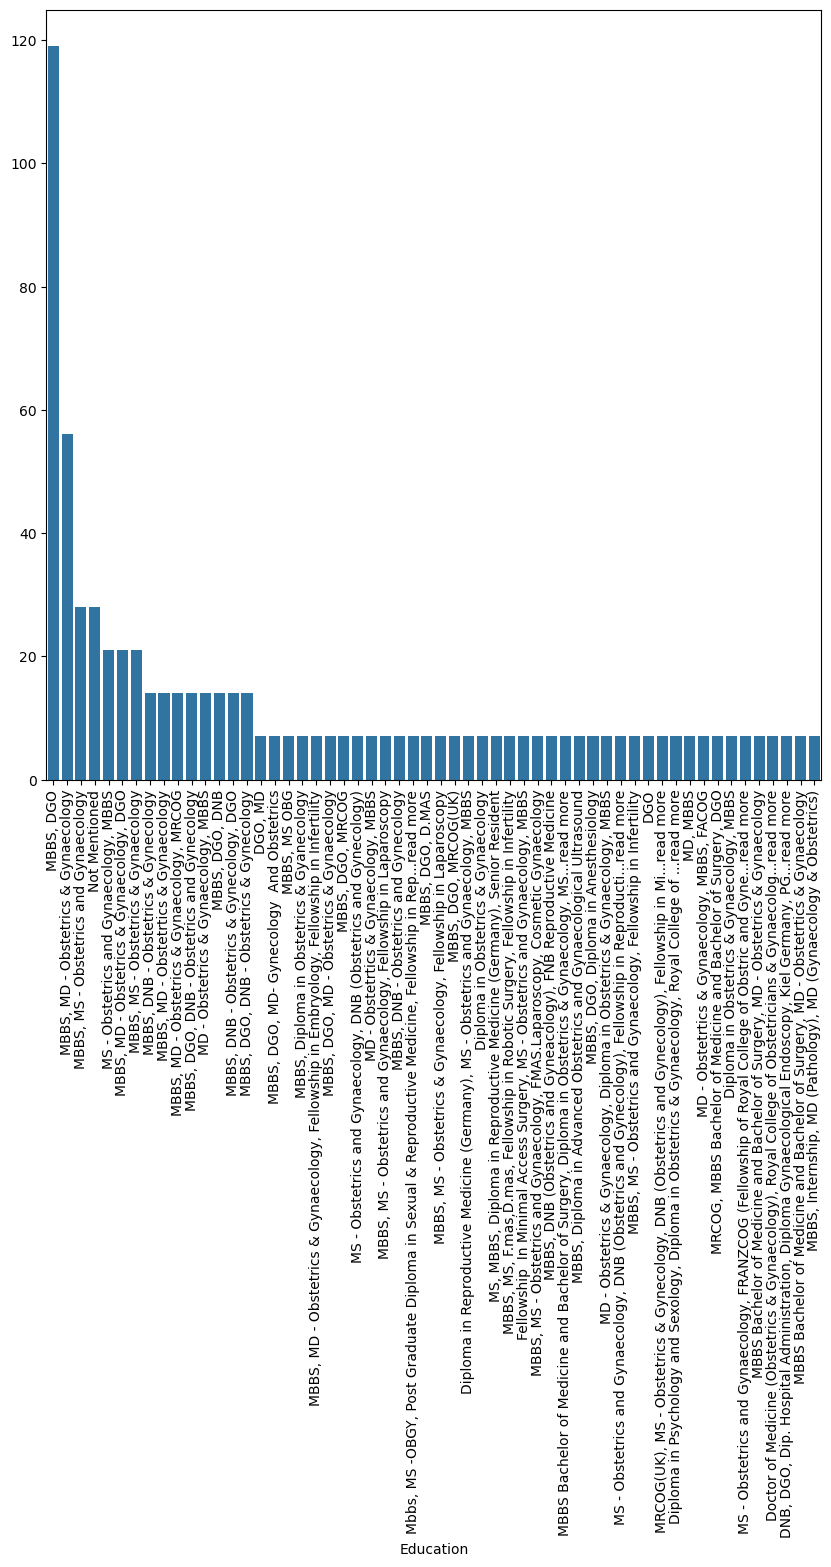

In [33]:
plt.figure(figsize=(10,10))
education_counts = df['Education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Education')
plt.xticks(rotation=90)
plt.show()

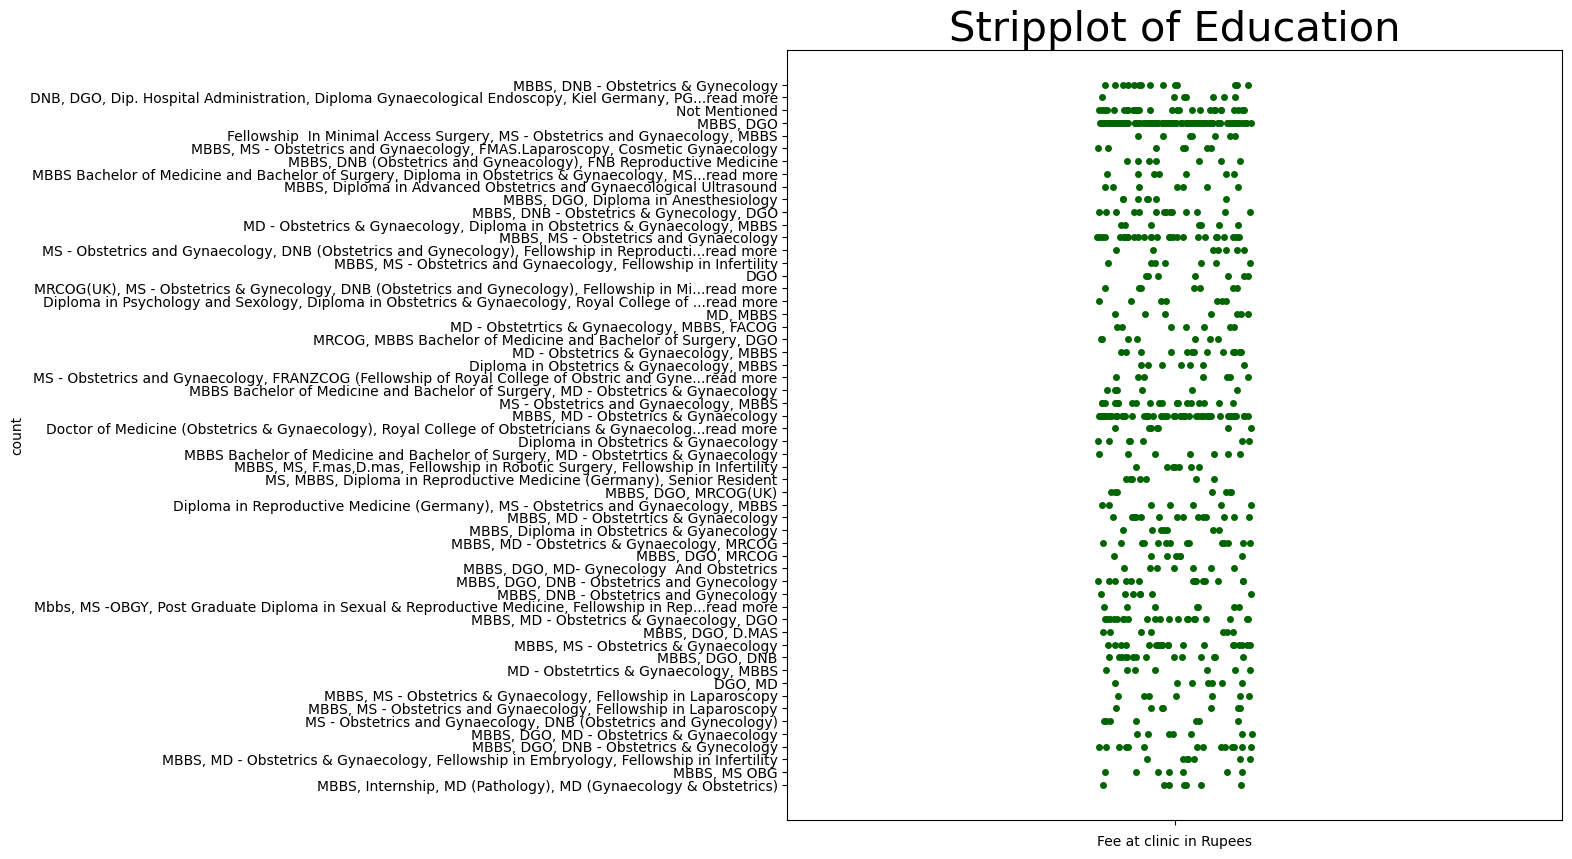

In [34]:
plt.figure(figsize=(10,10))
plt.title('Stripplot of Education', fontsize=30)
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.stripplot(data=df["Education"], color = 'darkgreen')
plt.xticks(rotation = 90)
plt.show()

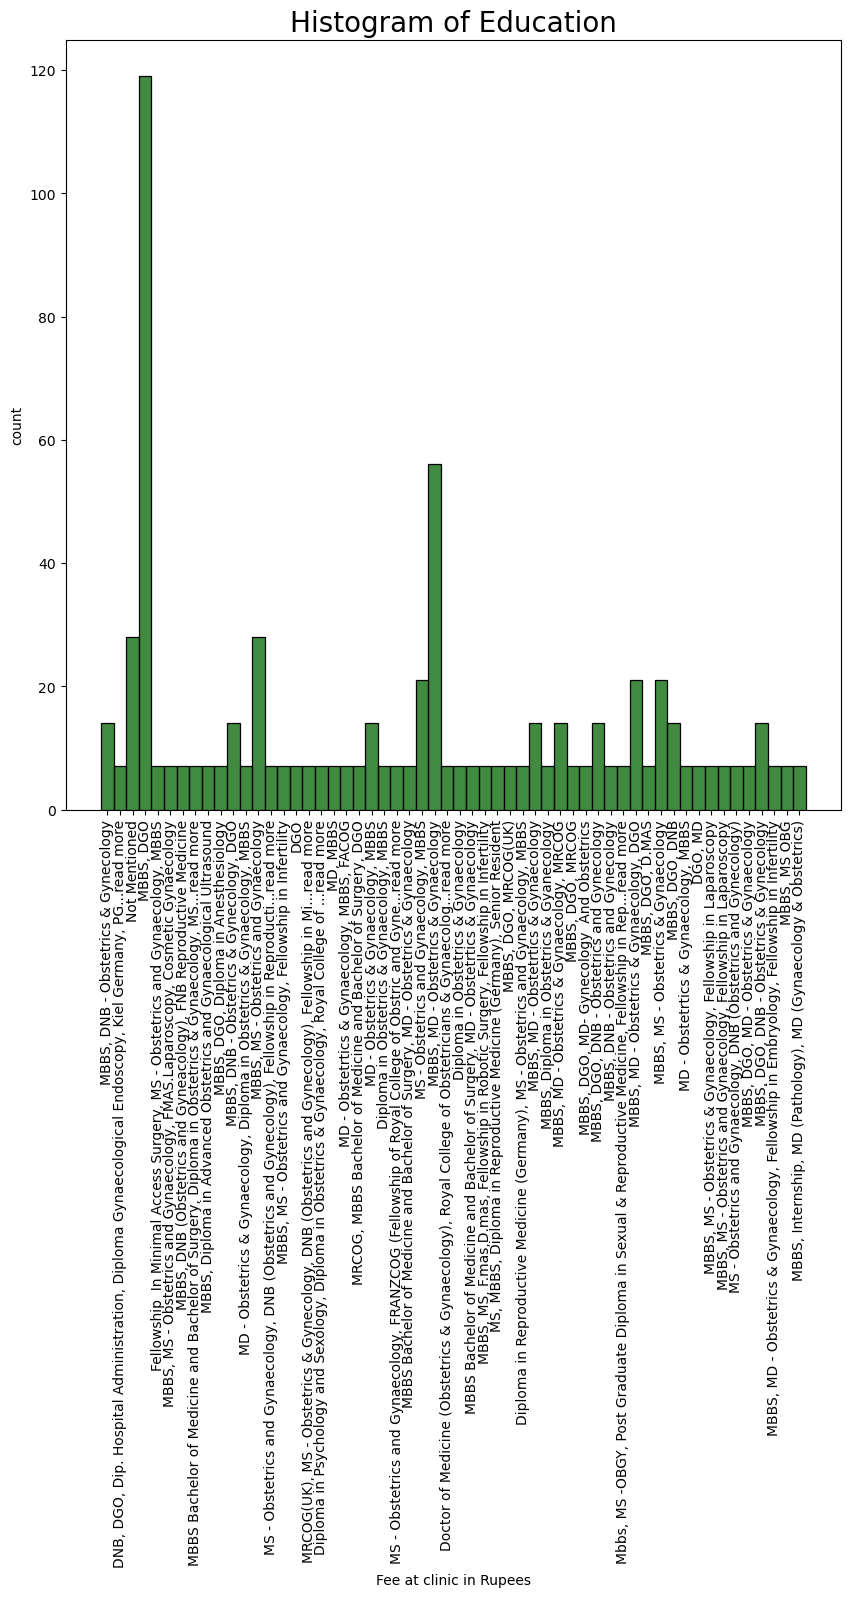

In [35]:
plt.figure(figsize=(10,10))
plt.title('Histogram of Education', fontsize=20)
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.histplot(data=df["Education"], color = 'darkgreen')
plt.xticks(rotation = 90)
plt.show()

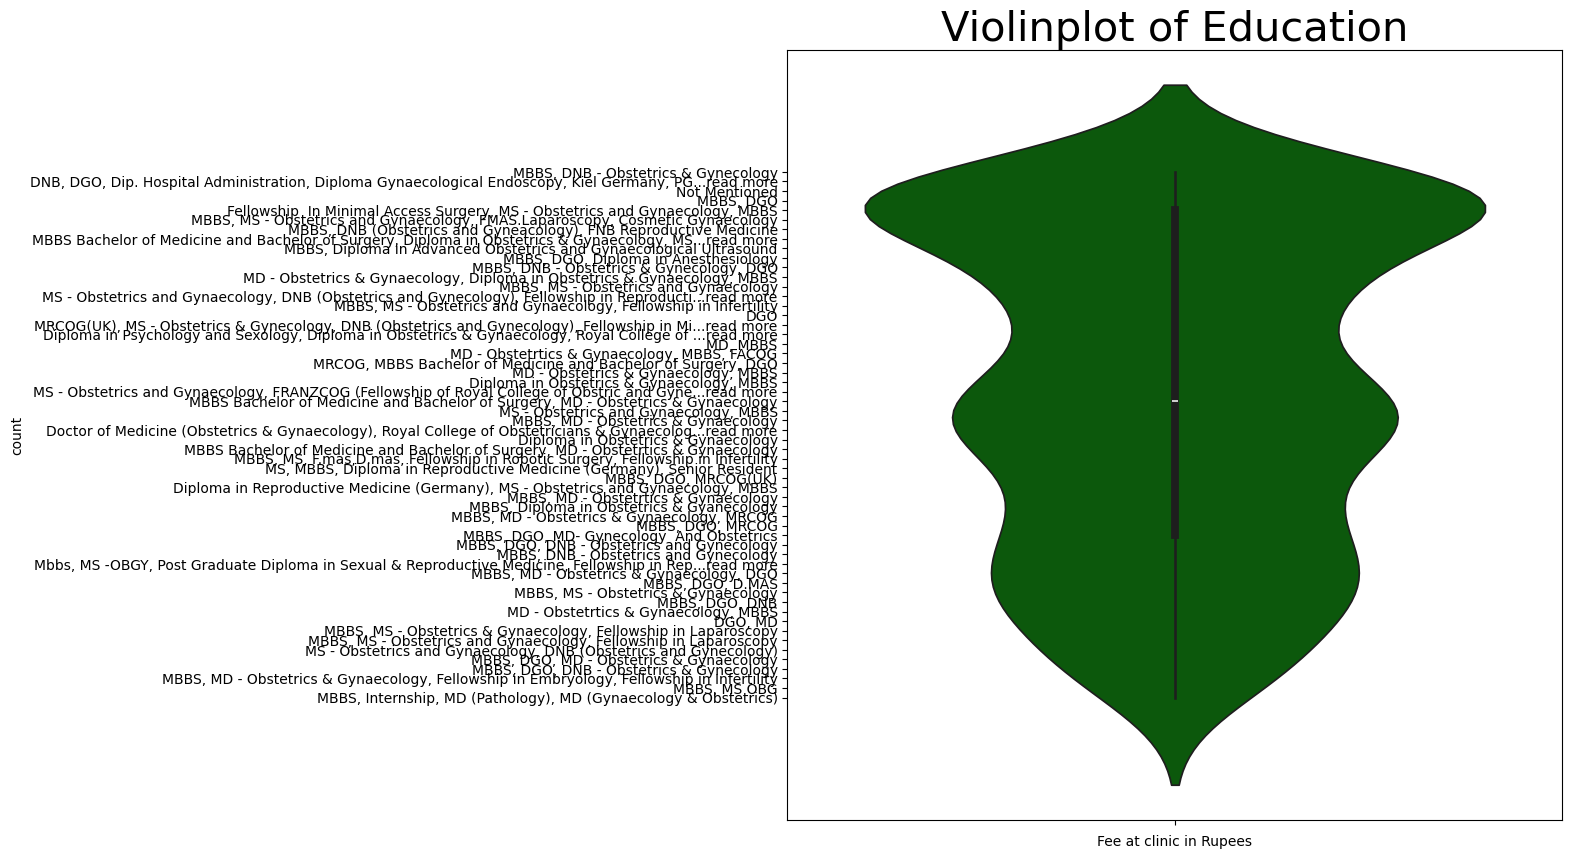

In [36]:
plt.figure(figsize=(10,10))
plt.title('Violinplot of Education', fontsize=30)
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.violinplot(data=df["Education"], color = 'darkgreen')
plt.xticks(rotation = 90)
plt.show()

In [37]:
education_counts.unique

<bound method Series.unique of Education
MBBS, DGO                                                                                                 119
MBBS, MD - Obstetrics & Gynaecology                                                                        56
MBBS, MS - Obstetrics and Gynaecology                                                                      28
Not Mentioned                                                                                              28
MS - Obstetrics and Gynaecology, MBBS                                                                      21
MBBS, MD - Obstetrics & Gynaecology, DGO                                                                   21
MBBS, MS - Obstetrics & Gynaecology                                                                        21
MBBS, DNB - Obstetrics & Gynecology                                                                        14
MBBS, MD - Obstetrtics & Gynaecology                                           

 - From the histogram plot large number of `Online Fee` are in between 300 to 400 rupees 
    - and lowest between600 to 800 rupeess

## Number of Hours Avaliable

In [40]:
df['Number of Hrs. Available'].max()

'13:00'

In [41]:
df['Number of Hrs. Available'].min()

'00:00'

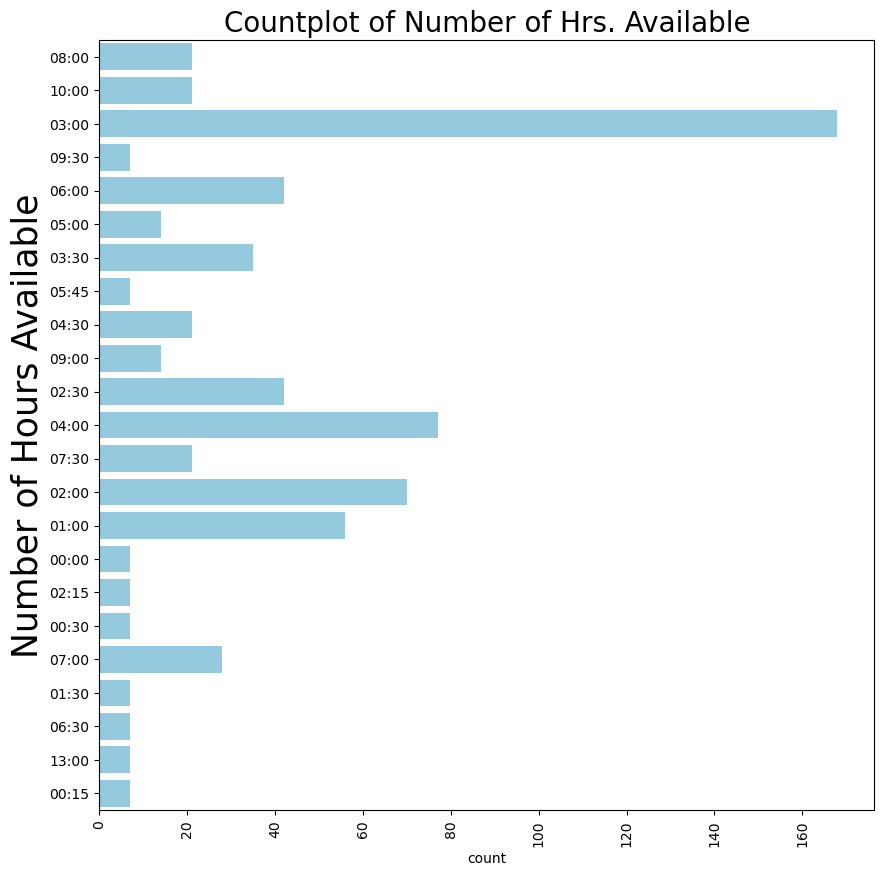

In [42]:
plt.figure(figsize=(10,10))
plt.title('Countplot of Number of Hrs. Available', fontsize=20)
plt.ylabel('Number of Hours Available', fontsize = 25)
sns.countplot(data=df["Number of Hrs. Available"], color = 'skyblue')
plt.xticks(rotation = 90)
plt.show()

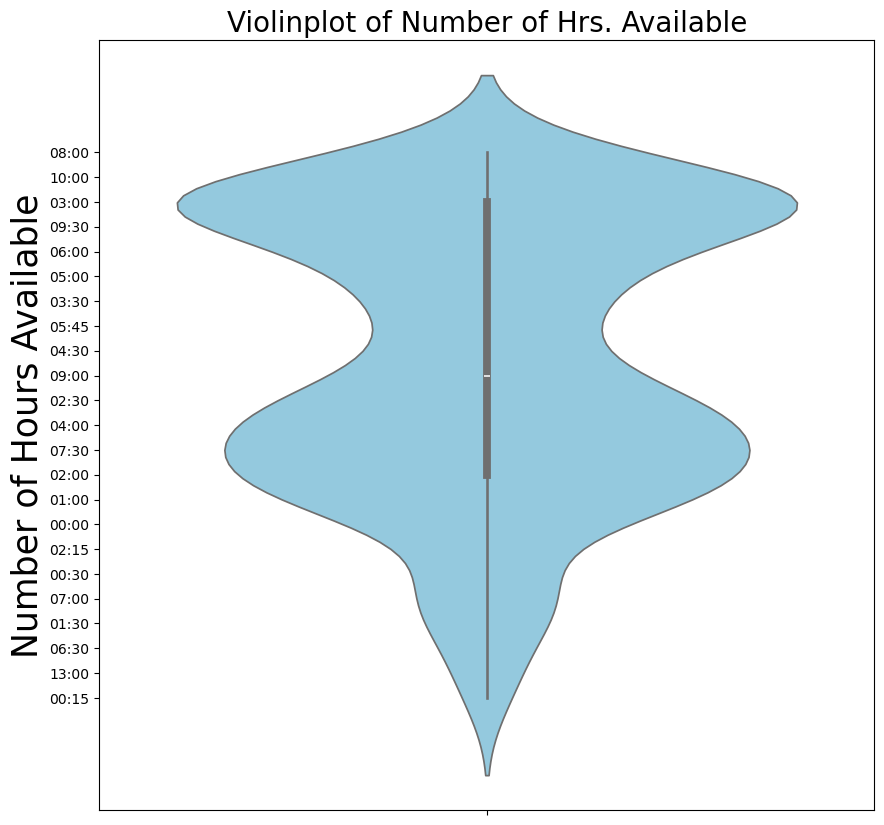

In [43]:
plt.figure(figsize=(10,10))
plt.title('Violinplot of Number of Hrs. Available', fontsize=20)
plt.ylabel('Number of Hours Available', fontsize = 25)
sns.violinplot(data=df["Number of Hrs. Available"], color = 'skyblue')
plt.xticks(rotation = 90)
plt.show()

  - From the histogram plot large number of `Total Fee` are in between 500 to 750 rupees 
        - and lowest between 1500 to 1750 rupees

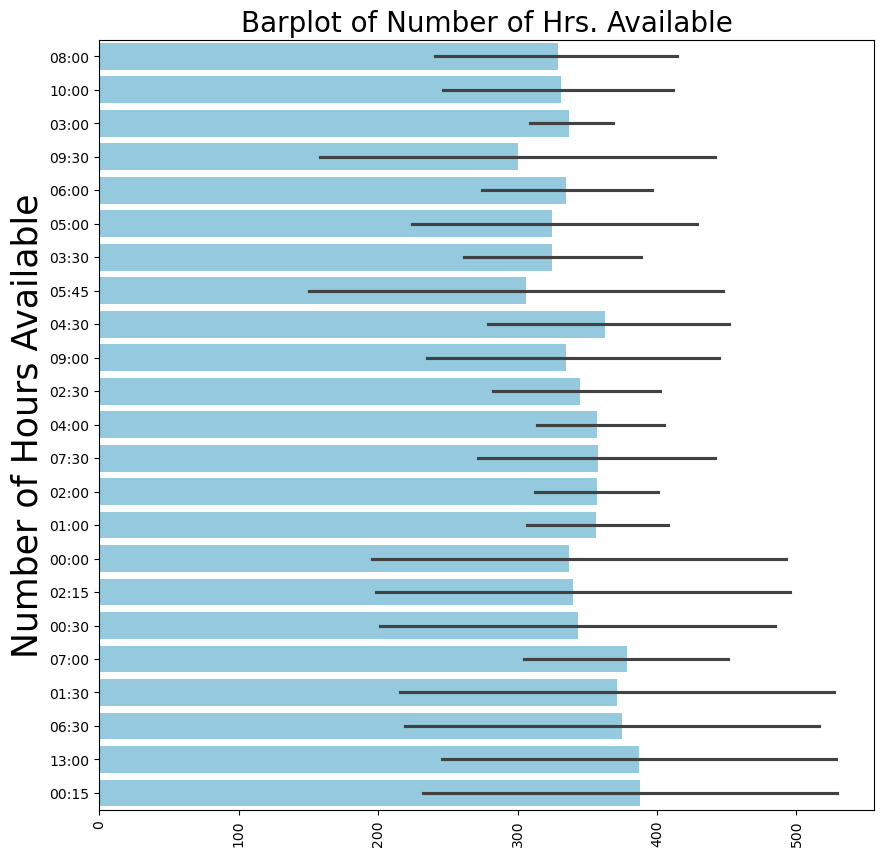

In [45]:
plt.figure(figsize=(10,10))
plt.title('Barplot of Number of Hrs. Available', fontsize=20)
plt.ylabel('Number of Hours Available', fontsize = 25)
sns.barplot(data=df["Number of Hrs. Available"], color = 'skyblue')
plt.xticks(rotation = 90)
plt.show()

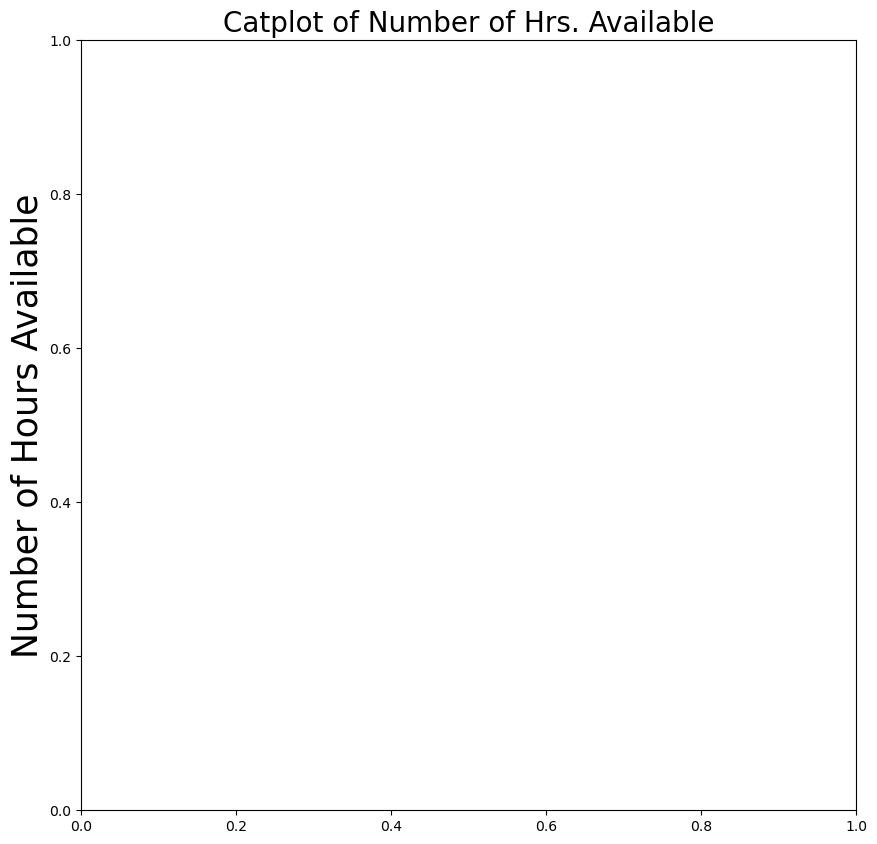

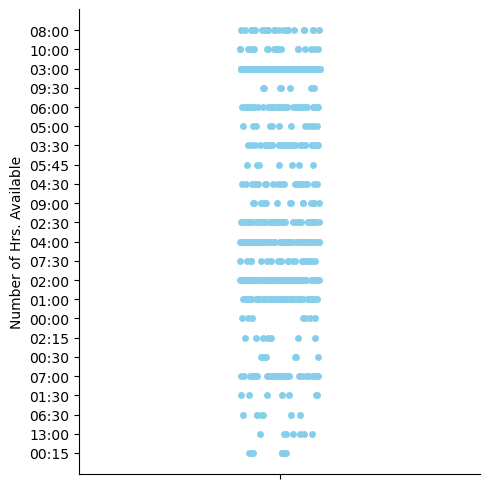

In [46]:
plt.figure(figsize=(10,10))
plt.title('Catplot of Number of Hrs. Available', fontsize=20)
plt.ylabel('Number of Hours Available', fontsize = 25)
sns.catplot(data=df["Number of Hrs. Available"], color = 'skyblue')
plt.xticks(rotation = 90)
plt.show()

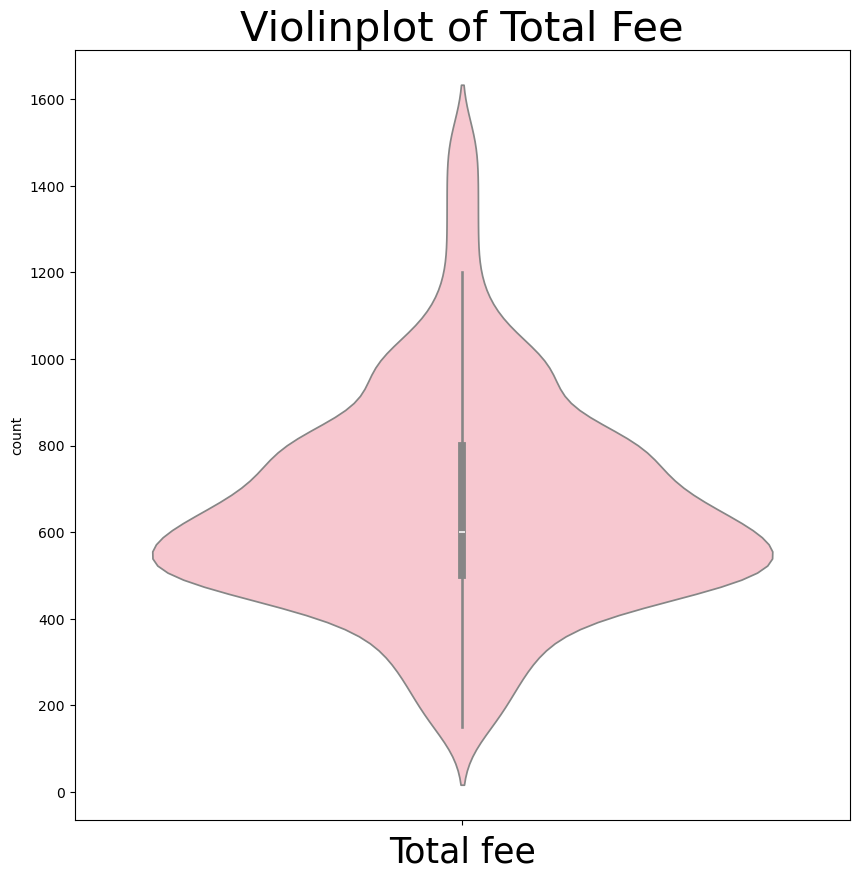

In [47]:
plt.figure(figsize=(10,10))
plt.title('Violinplot of Total Fee', fontsize=30)
plt.ylabel('count')
plt.xlabel('Total fee', fontsize = 25)
sns.violinplot(data=df["Total Fee"], color = 'pink')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Total Fee'>

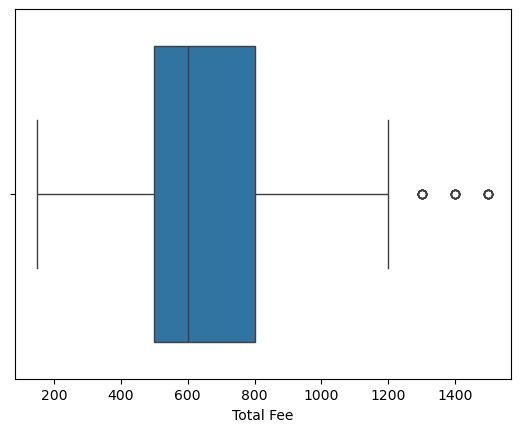

In [48]:
# box plot
sns.boxplot(x=df["Total Fee"])

## Area Avaliable

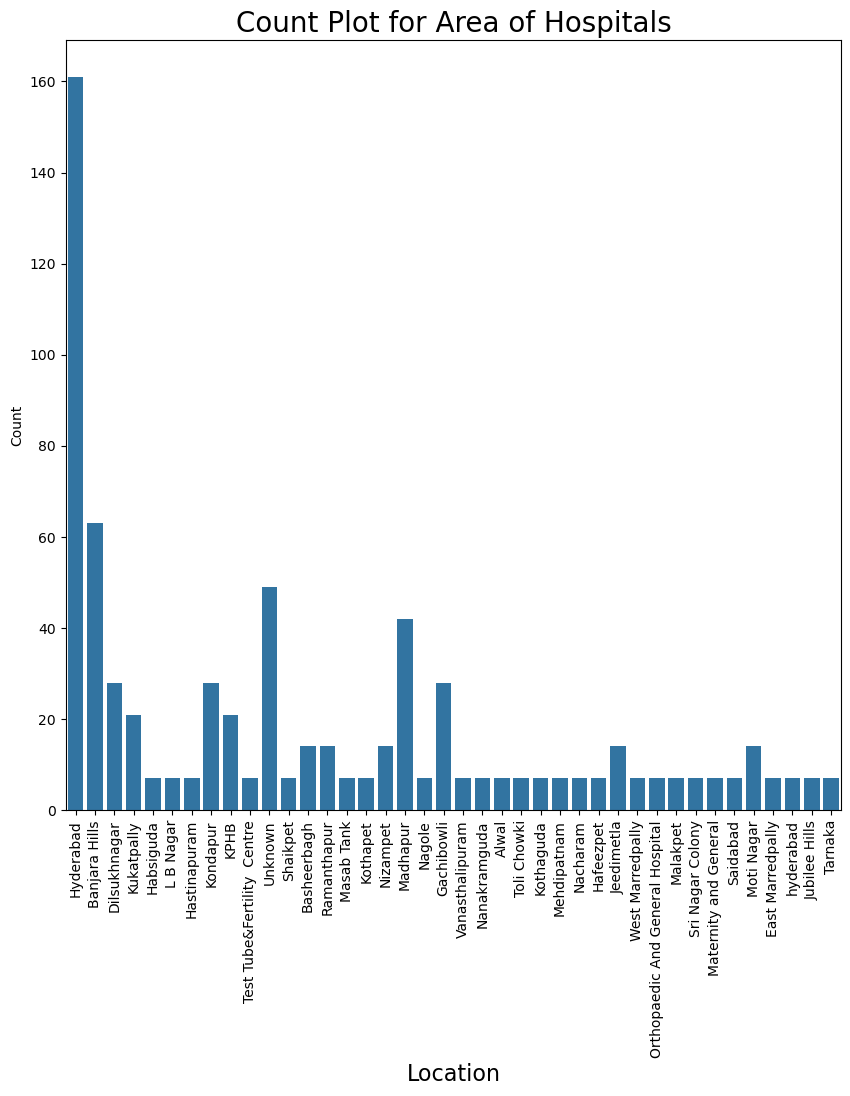

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(data = df,x = 'Area')
plt.xlabel("Location", fontsize = 16)
plt.title("Count Plot for Area of Hospitals", fontsize=20)
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Figure size 2000x2000 with 0 Axes>

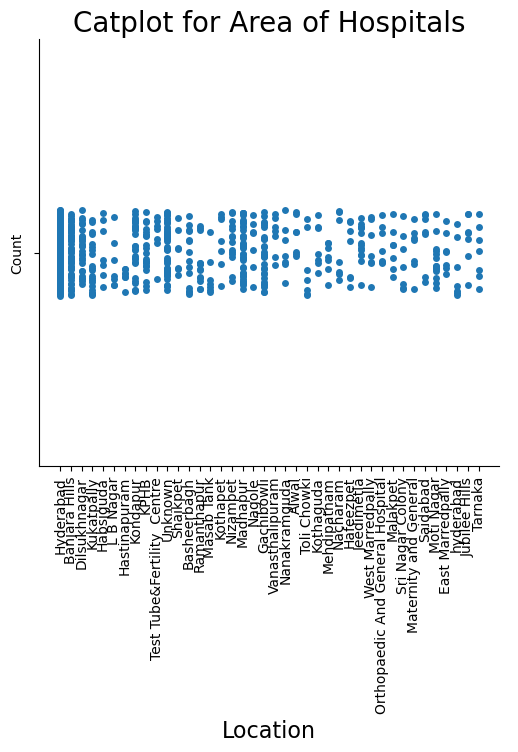

In [52]:
plt.figure(figsize=(20,20),edgecolor='black')
sns.catplot(data = df,x = 'Area')
plt.xlabel("Location", fontsize = 16)
plt.title("Catplot for Area of Hospitals", fontsize=20)
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

## Number of Doctors in Hyderabad

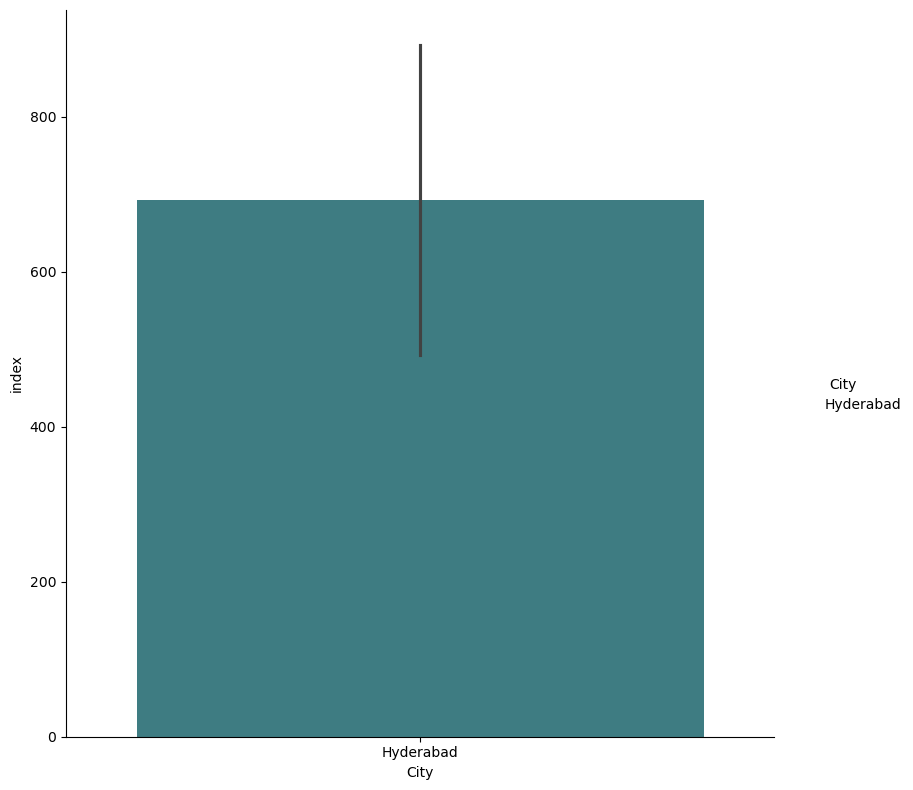

In [54]:
sns.catplot(
    data=df.reset_index(), kind="bar",
    x="City", y="index",legend=True,
    estimator='count',
    errorbar="sd", palette="crest", height=8)
plt.show()

# correlation

## Heat map of all float columns

In [57]:
df[['Fee at clinic','Online Fee']].corr()

Fee at clinic  Online Fee
Fee at clinic       1.000000    0.243791
Online Fee          0.243791    1.000000

In [58]:
print(df.select_dtypes('float').head())

   Experience (in years)  Fee at clinic  Online Fee
0                   13.0          800.0       500.0
1                    8.0          500.0       300.0
2                    0.0          500.0       300.0
3                   17.0          500.0       300.0
4                   14.0          500.0       500.0


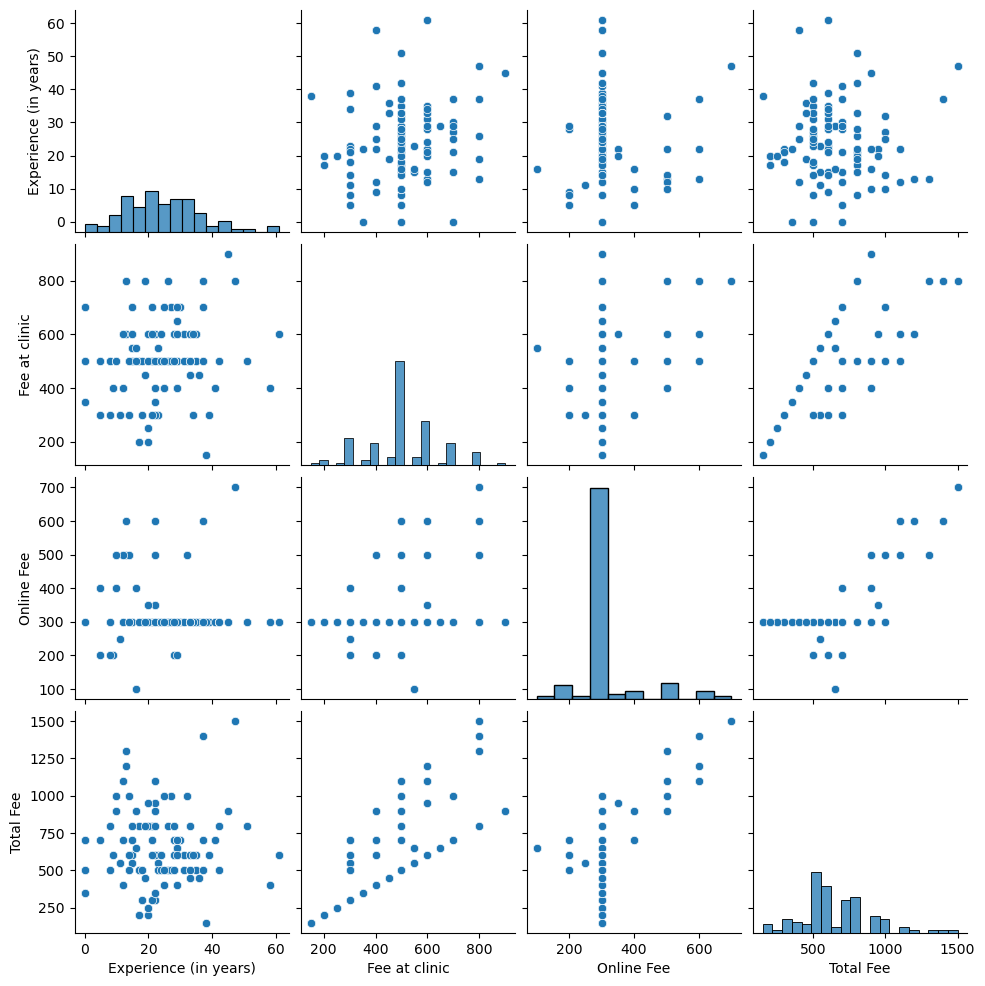

In [59]:
sns.pairplot(df)

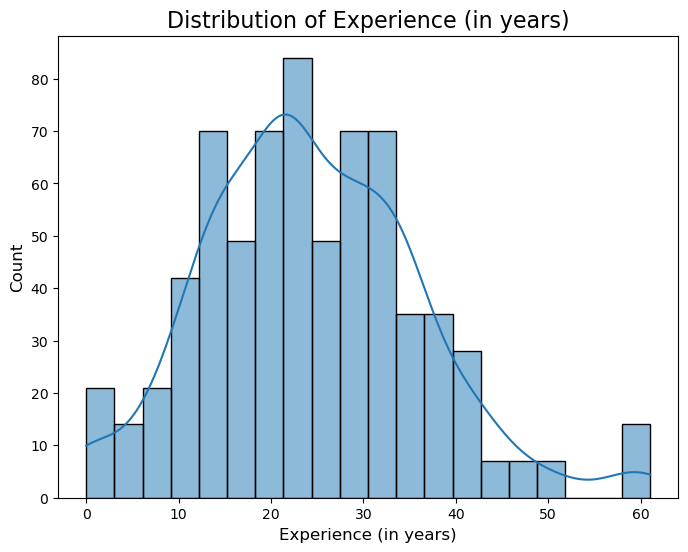

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Experience (in years)'], bins=20, kde=True)
plt.title('Distribution of Experience (in years)', fontsize=16)
plt.xlabel('Experience (in years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


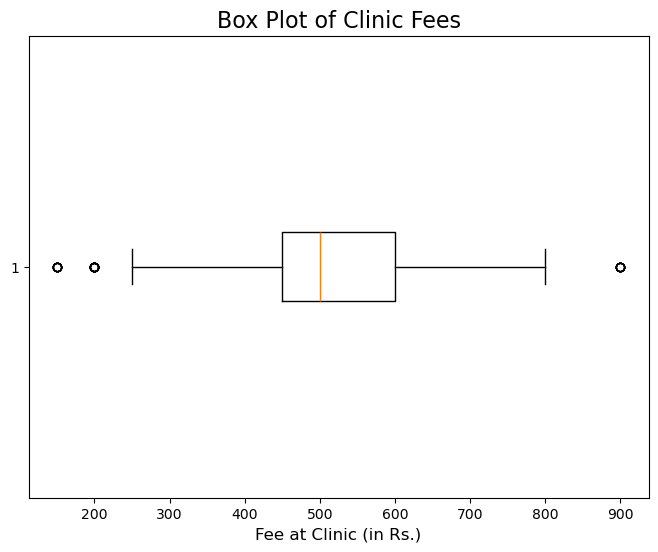

In [61]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Fee at clinic'], vert=False)
plt.title('Box Plot of Clinic Fees', fontsize=16)
plt.xlabel('Fee at Clinic (in Rs.)', fontsize=12)
plt.show()

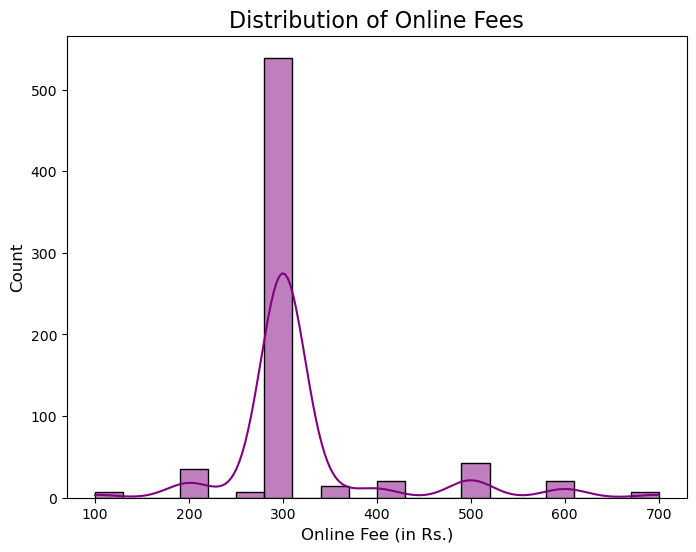

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Online Fee'], bins=20, kde=True, color='purple')
plt.title('Distribution of Online Fees', fontsize=16)
plt.xlabel('Online Fee (in Rs.)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


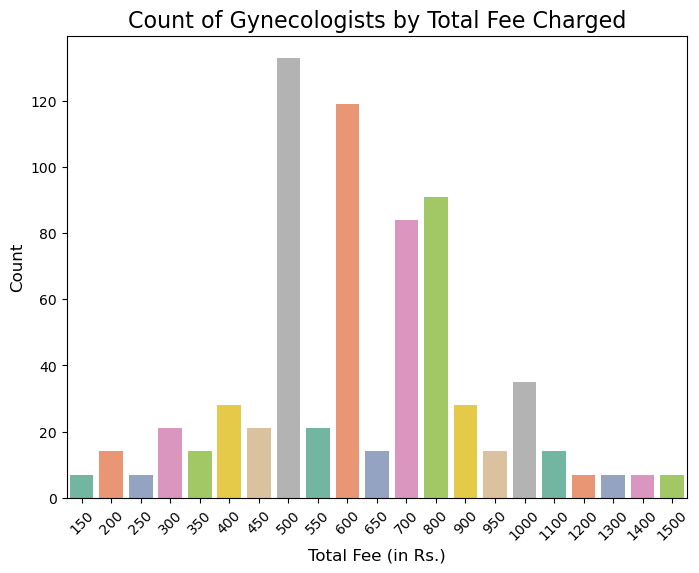

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Total Fee', data=df, palette='Set2')
plt.title('Count of Gynecologists by Total Fee Charged', fontsize=16)
plt.xlabel('Total Fee (in Rs.)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


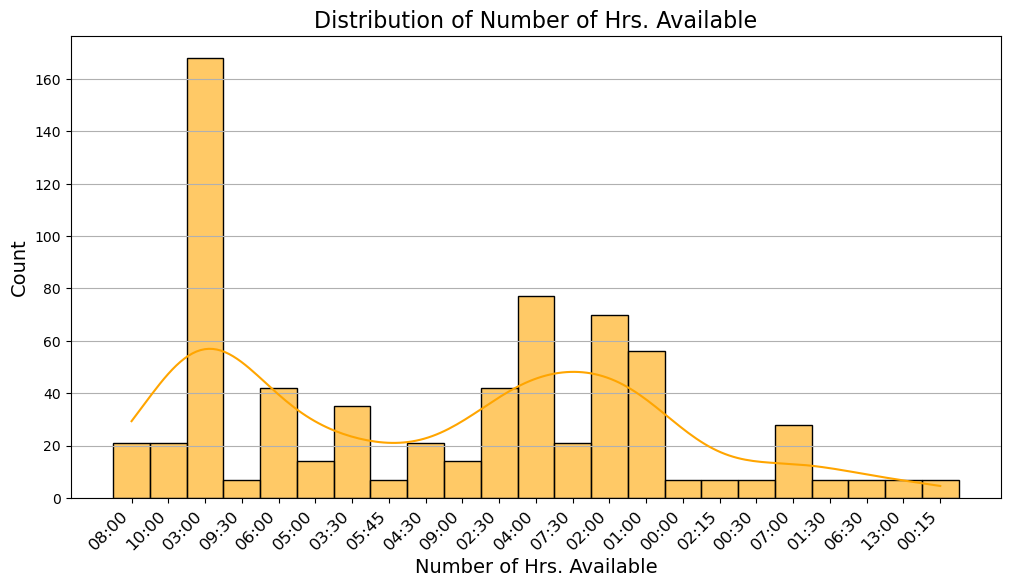

In [64]:
data = df['Number of Hrs. Available']

plt.figure(figsize=(12, 6))
sns.histplot(data, bins=30, kde=True, color='orange', stat='count', alpha=0.6)

plt.title('Distribution of Number of Hrs. Available', fontsize=16)
plt.xlabel('Number of Hrs. Available', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.grid(axis='y')

plt.show()

# **<center>Bivariate Visualizations</center>**

### Experience vs Fee at Clinic

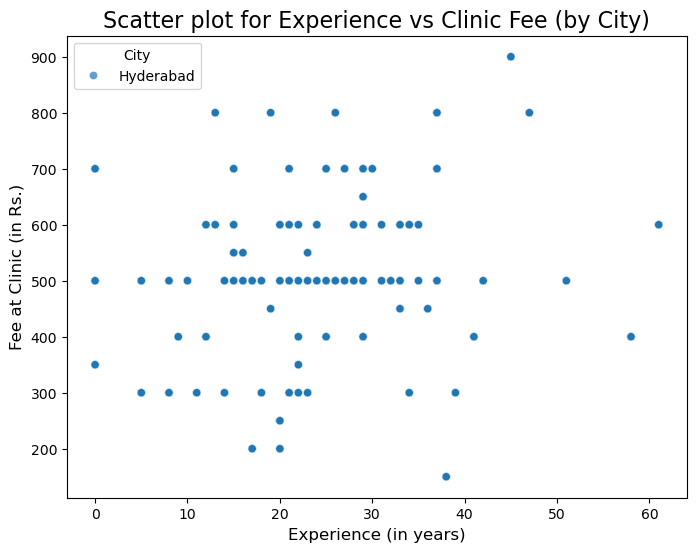

In [214]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Experience (in years)', y='Fee at clinic', data=df, hue='City', alpha=0.7)
plt.title('Scatter plot for Experience vs Clinic Fee (by City)', fontsize=16)
plt.xlabel('Experience (in years)', fontsize=12)
plt.ylabel('Fee at Clinic (in Rs.)', fontsize=12)
plt.legend(title='City', loc='upper left')
plt.show()


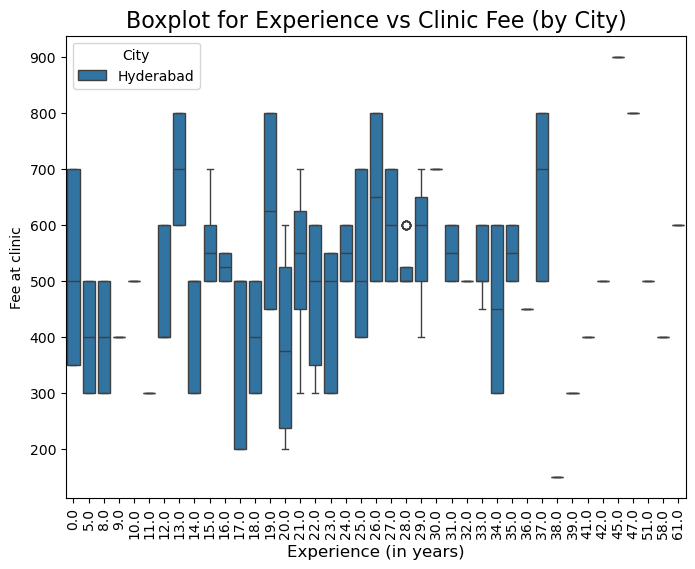

In [218]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Experience (in years)', y='Fee at clinic', data=df, hue='City')
plt.title('Boxplot for Experience vs Clinic Fee (by City)', fontsize=16)
plt.xlabel('Experience (in years)', fontsize=12)
plt.xticks(rotation = 90)
plt.gca().patch.set_alpha(0.7)  # Set transparency
plt.show()

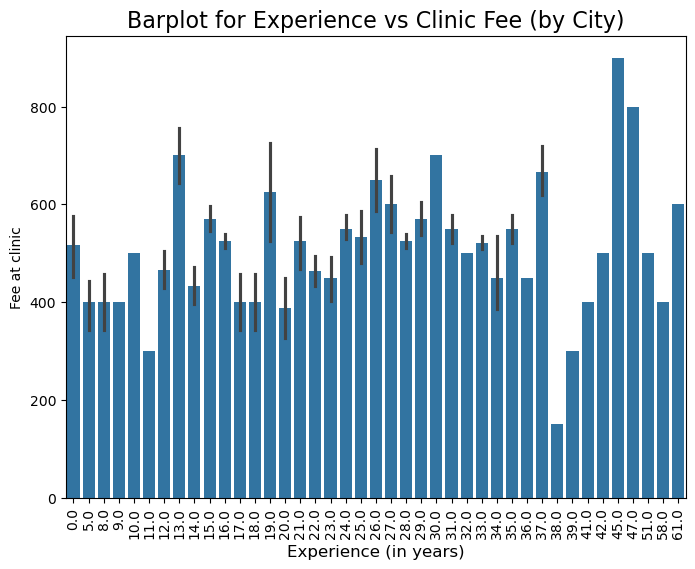

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Experience (in years)', y='Fee at clinic', data=df)
plt.title('Barplot for Experience vs Clinic Fee (by City)', fontsize=16)
plt.xlabel('Experience (in years)', fontsize=12)
plt.xticks(rotation = 90)
plt.gca().patch.set_alpha(0.7)  # Set transparency
plt.show()

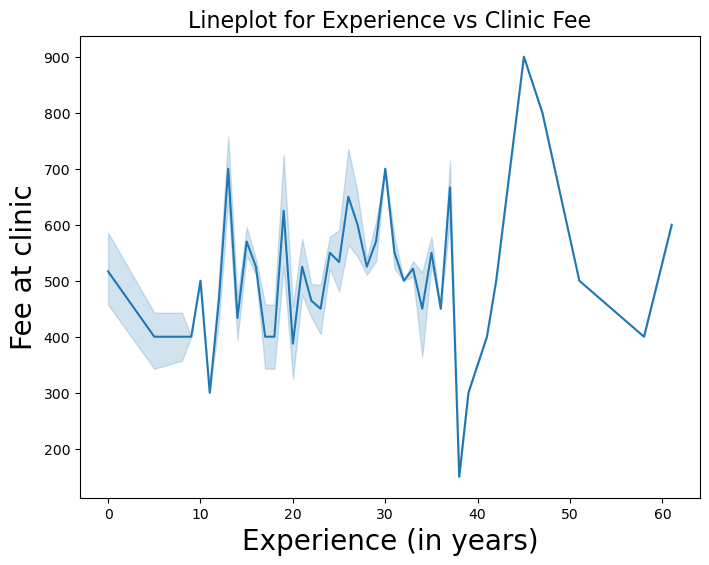

In [70]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Experience (in years)', y='Fee at clinic', data=df)

# Set title and labels with font sizes
plt.title('Lineplot for Experience vs Clinic Fee', fontsize=16)
plt.xlabel('Experience (in years)', fontsize=20)
plt.ylabel('Fee at clinic', fontsize=20)

# Set tick font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Online Fee vs Total Fee

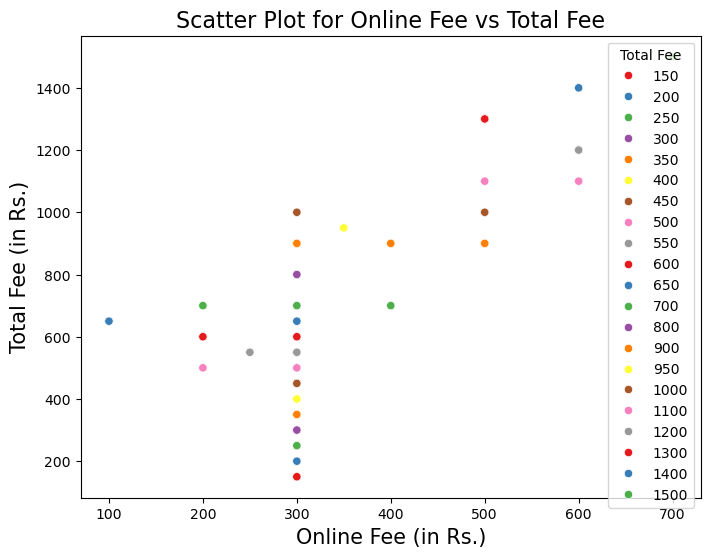

In [220]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Online Fee', y='Total Fee', data=df, hue='Total Fee', palette='Set1')
plt.title('Scatter Plot for Online Fee vs Total Fee', fontsize=16)
plt.xlabel('Online Fee (in Rs.)', fontsize=15)
plt.ylabel('Total Fee (in Rs.)', fontsize=15)
plt.show()

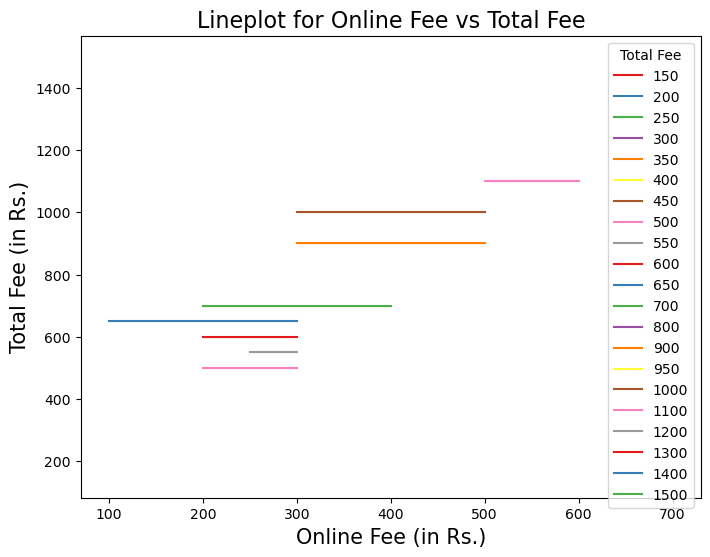

In [73]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Online Fee', y='Total Fee', data=df, hue='Total Fee', palette='Set1')
plt.title('Lineplot for Online Fee vs Total Fee', fontsize=16)
plt.xlabel('Online Fee (in Rs.)', fontsize=15)
plt.ylabel('Total Fee (in Rs.)', fontsize=15)
plt.show()

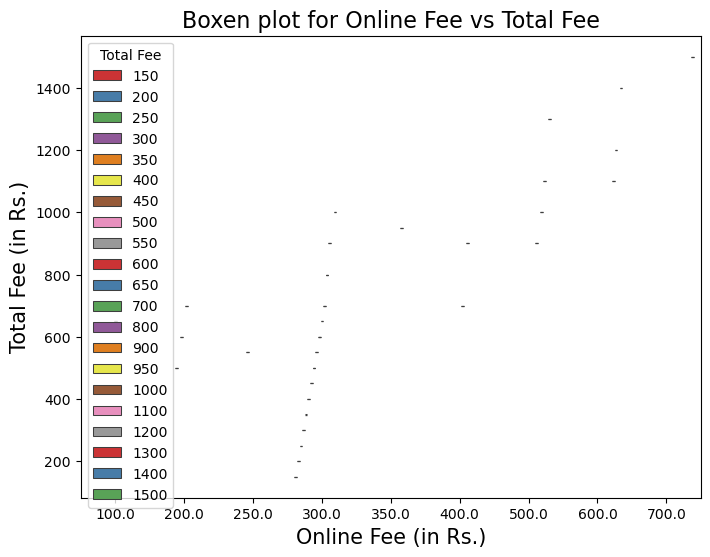

In [74]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Online Fee', y='Total Fee', data=df, hue='Total Fee', palette='Set1')
plt.title('Boxen plot for Online Fee vs Total Fee', fontsize=16)
plt.xlabel('Online Fee (in Rs.)', fontsize=15)
plt.ylabel('Total Fee (in Rs.)', fontsize=15)
plt.show()

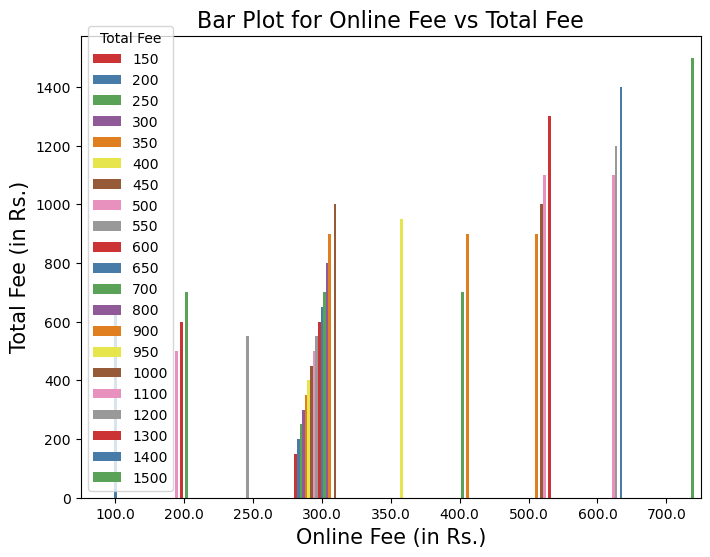

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Online Fee', y='Total Fee', data=df, hue='Total Fee', palette='Set1')
plt.title('Bar Plot for Online Fee vs Total Fee', fontsize=16)
plt.xlabel('Online Fee (in Rs.)', fontsize=15)
plt.ylabel('Total Fee (in Rs.)', fontsize=15)
plt.show()

## Number of Hrs. Available vs Fee at Clinic


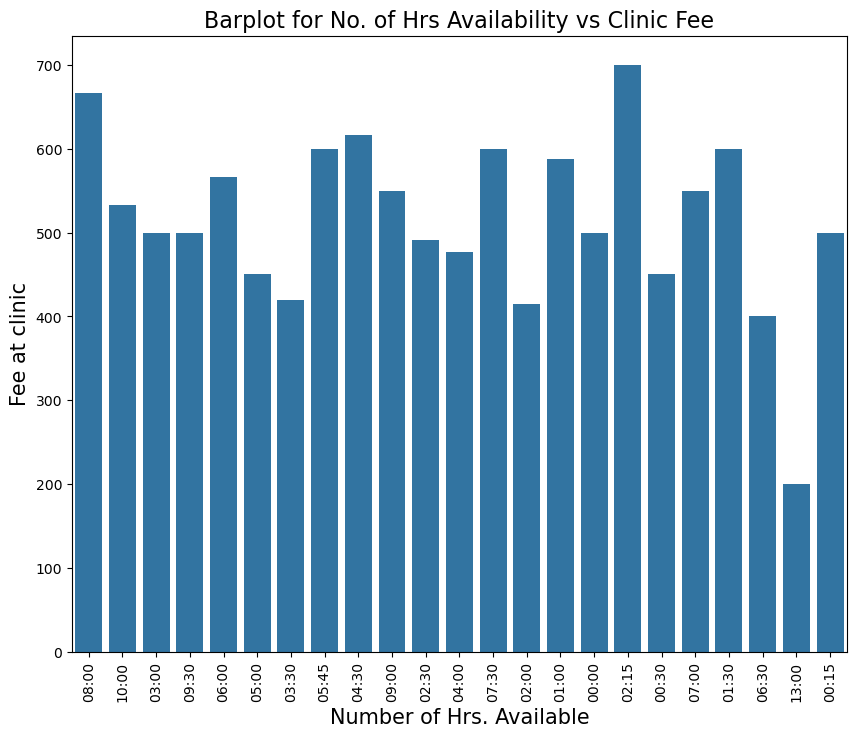

In [222]:
plt.figure(figsize=(10,8))
sns.barplot(x='Number of Hrs. Available', y='Fee at clinic', data=df, errorbar=None)

plt.title('Barplot for No. of Hrs Availability vs Clinic Fee', fontsize=16)
plt.xlabel('Number of Hrs. Available', fontsize=15)
plt.ylabel('Fee at clinic', fontsize=15)

plt.xticks(rotation = 90)

plt.show()

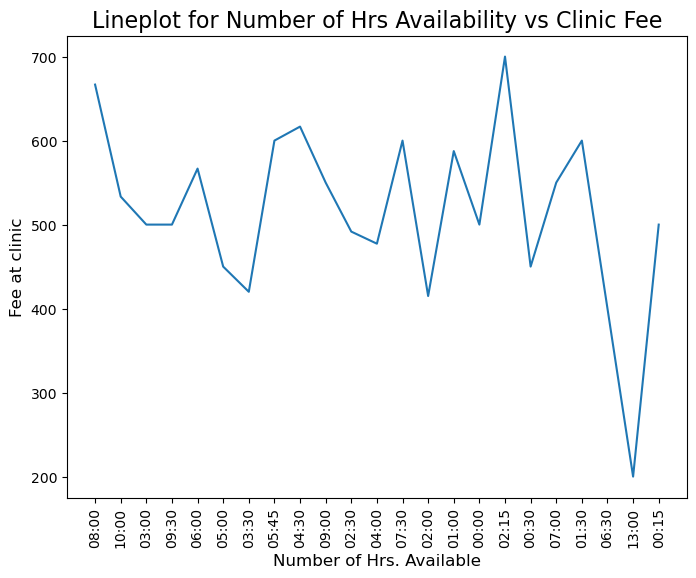

In [224]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Number of Hrs. Available', y='Fee at clinic', data=df, errorbar=None)

# Alternatively, if you want to color by a specific variable (e.g., 'City')
#sns.lineplot(x='Number of Hrs. Available', y='Fee at clinic', hue='City', data=df, palette='pastel')

plt.title('Lineplot for Number of Hrs Availability vs Clinic Fee', fontsize=16)
plt.xlabel('Number of Hrs. Available', fontsize=12)
plt.ylabel('Fee at clinic', fontsize=12)
plt.xticks(rotation = 90)

plt.show()

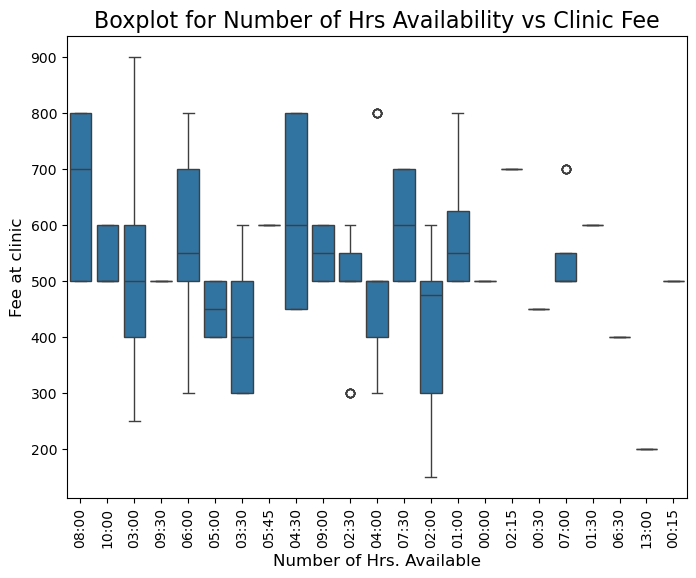

In [226]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Number of Hrs. Available', y='Fee at clinic', data=df)

plt.title('Boxplot for Number of Hrs Availability vs Clinic Fee', fontsize=16)
plt.xlabel('Number of Hrs. Available', fontsize=12)
plt.ylabel('Fee at clinic', fontsize=12)

plt.xticks(rotation = 90)

plt.show()

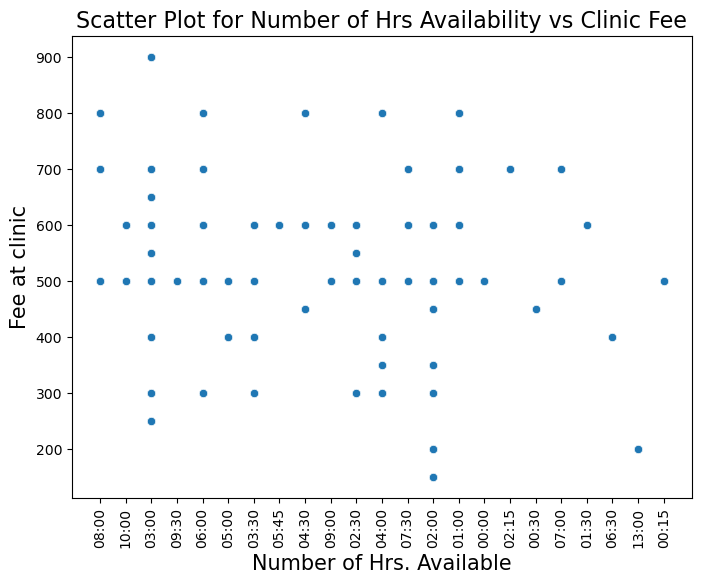

In [228]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of Hrs. Available', y='Fee at clinic', data=df)

plt.title('Scatter Plot for Number of Hrs Availability vs Clinic Fee', fontsize=16)
plt.xlabel('Number of Hrs. Available', fontsize=15)
plt.ylabel('Fee at clinic', fontsize=15)

plt.xticks(rotation = 90)

plt.show()

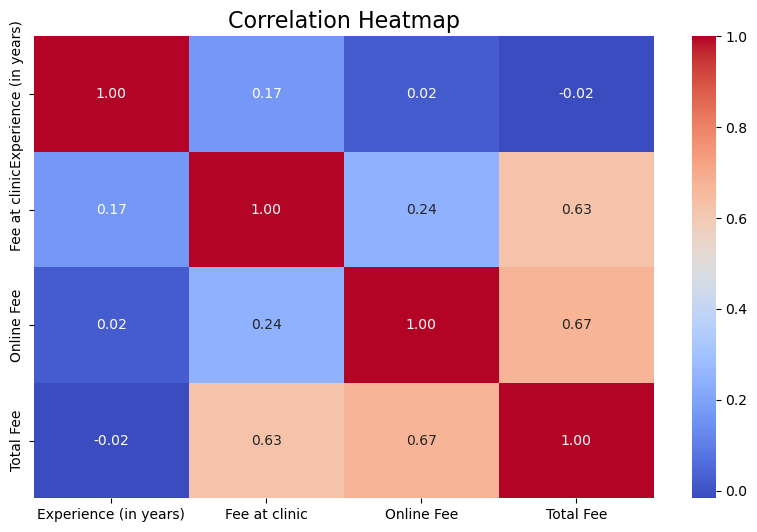

In [81]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

1. Experience (Years)
Univariate Visualization: Histogram
Question: What is the most common experience range among gynecologists?
Insight: Most gynecologists have around 5-10 years of experience.

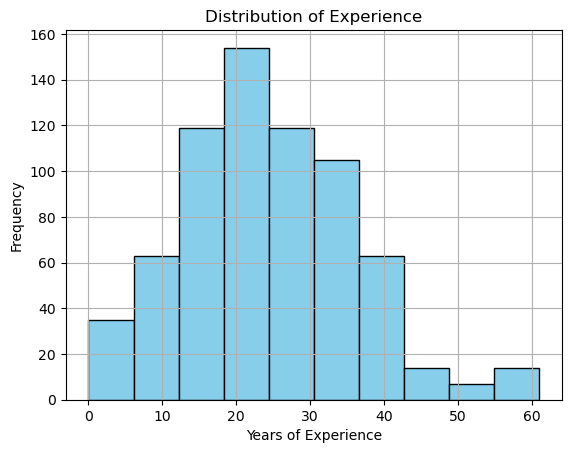

In [83]:
df['Experience (in years)'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()


#### Bivariate Visualization: **Box Plot (Experience vs. Gender)**
- **Question**: Does gender influence years of experience?
- **Insight**: This might reveal if male or female gynecologists tend to have more experience.

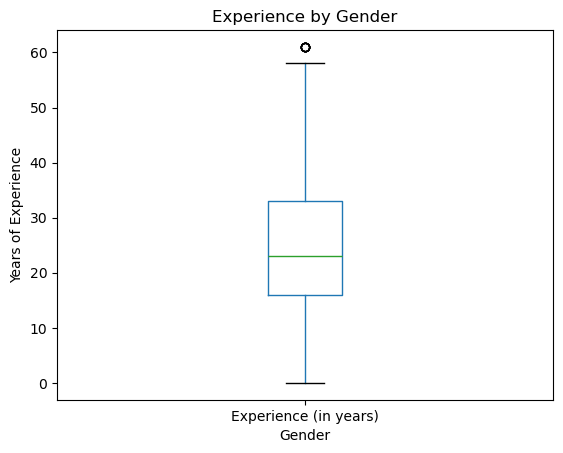

In [85]:
df.boxplot(column='Experience (in years)', grid=False)
plt.title('Experience by Gender')
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.show()

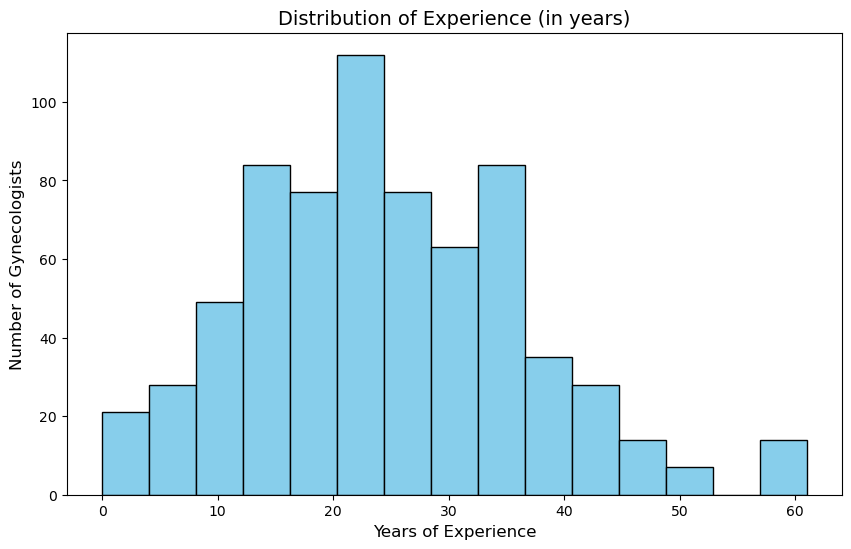

In [86]:
import matplotlib.pyplot as plt

# Experience Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Experience (in years)'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Experience (in years)', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Number of Gynecologists', fontsize=12)
plt.show()


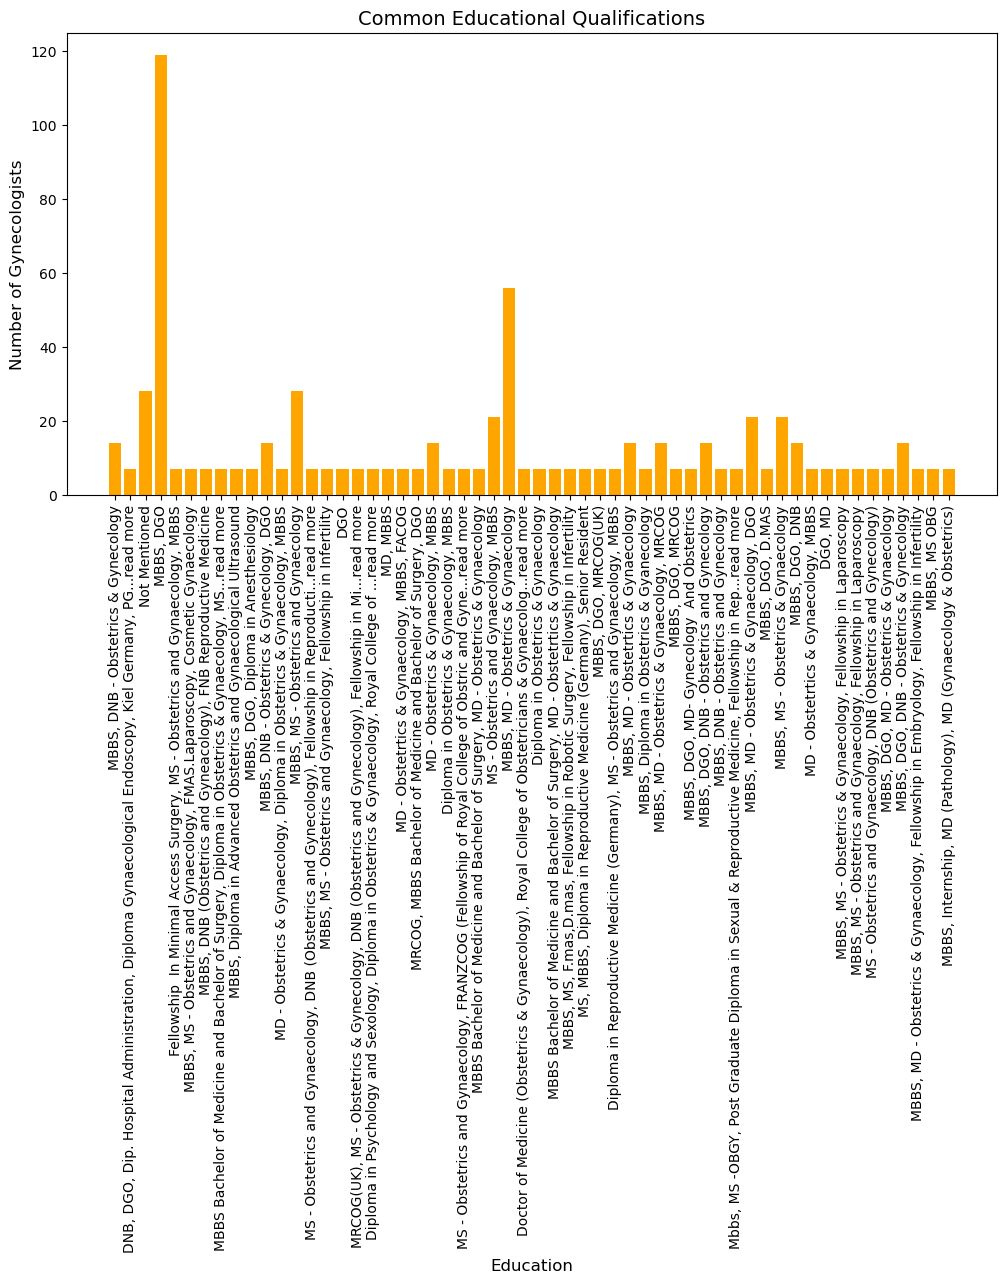

In [87]:
from collections import Counter

# Education frequency count
education_counts = Counter(df['Education'].dropna())
education_df = pd.DataFrame(education_counts.items(), columns=['Education', 'Count'])

# Plot Education Distribution
plt.figure(figsize=(12, 6))
plt.bar(education_df['Education'], education_df['Count'], color='orange')
plt.title('Common Educational Qualifications', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Number of Gynecologists', fontsize=12)
plt.xticks(rotation=90)
plt.show()


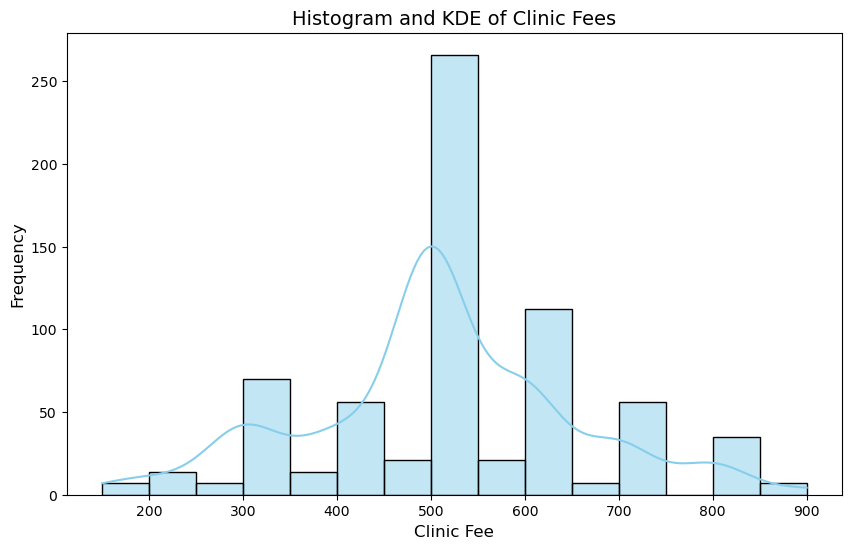

In [88]:
# Histogram with KDE for Clinic Fees
plt.figure(figsize=(10, 6))
sns.histplot(df['Fee at clinic'].dropna(), bins=15, kde=True, color='skyblue')
plt.title('Histogram and KDE of Clinic Fees', fontsize=14)
plt.xlabel('Clinic Fee', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


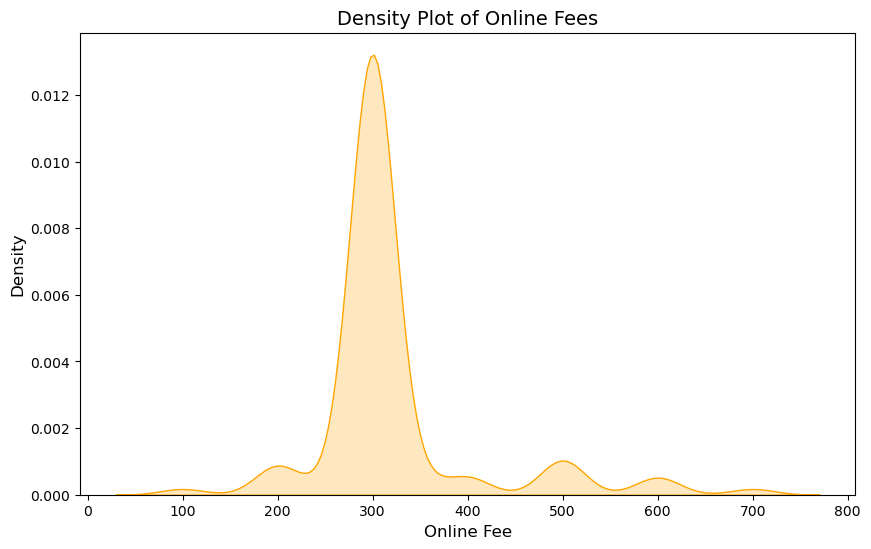

In [89]:
# Density Plot of Online Fees
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Online Fee'].dropna(), fill=True, color='orange')
plt.title('Density Plot of Online Fees', fontsize=14)
plt.xlabel('Online Fee', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


### Total Fee

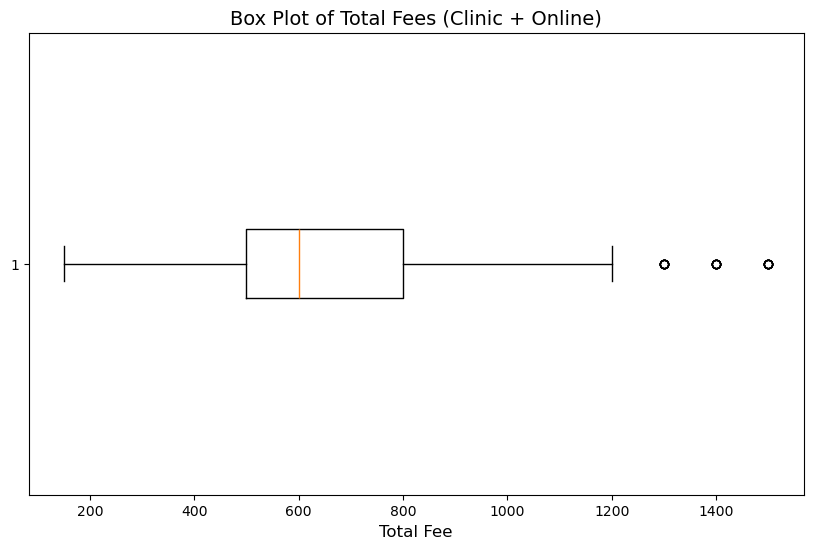

In [91]:
# Plot Total Fee Distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df['Total Fee'].dropna(), vert=False)
plt.title('Box Plot of Total Fees (Clinic + Online)', fontsize=14)
plt.xlabel('Total Fee', fontsize=12)
plt.show()

### Clinic Name

In [93]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


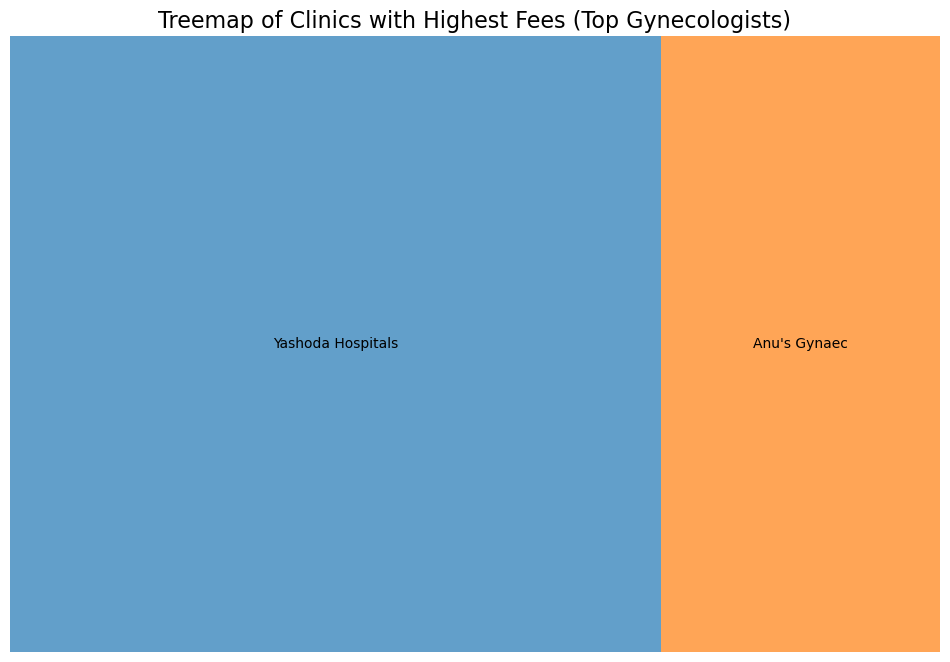

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load your dataset (make sure to adjust the path if needed)
# df = pd.read_excel('path_to_your_file.xlsx')

# Calculate the total fees
df['Total Fees'] = df['Fee at clinic'] + df['Online Fee']

# Select the top gynecologists based on total fees
top_gyn = df.nlargest(10, 'Total Fees')  # Adjust the number to include more/less

# Count the number of gynecologists per clinic among the top gynecologists
clinic_count = top_gyn['Clinic Name'].value_counts()

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=clinic_count.values, 
              label=clinic_count.index, 
              alpha=0.7, 
              color=plt.cm.tab10(range(len(clinic_count))))  # Use a colormap

plt.title('Treemap of Clinics with Highest Fees (Top Gynecologists)', fontsize=16)
plt.axis('off')  # Turn off axis
plt.show()


### Question:

### Area

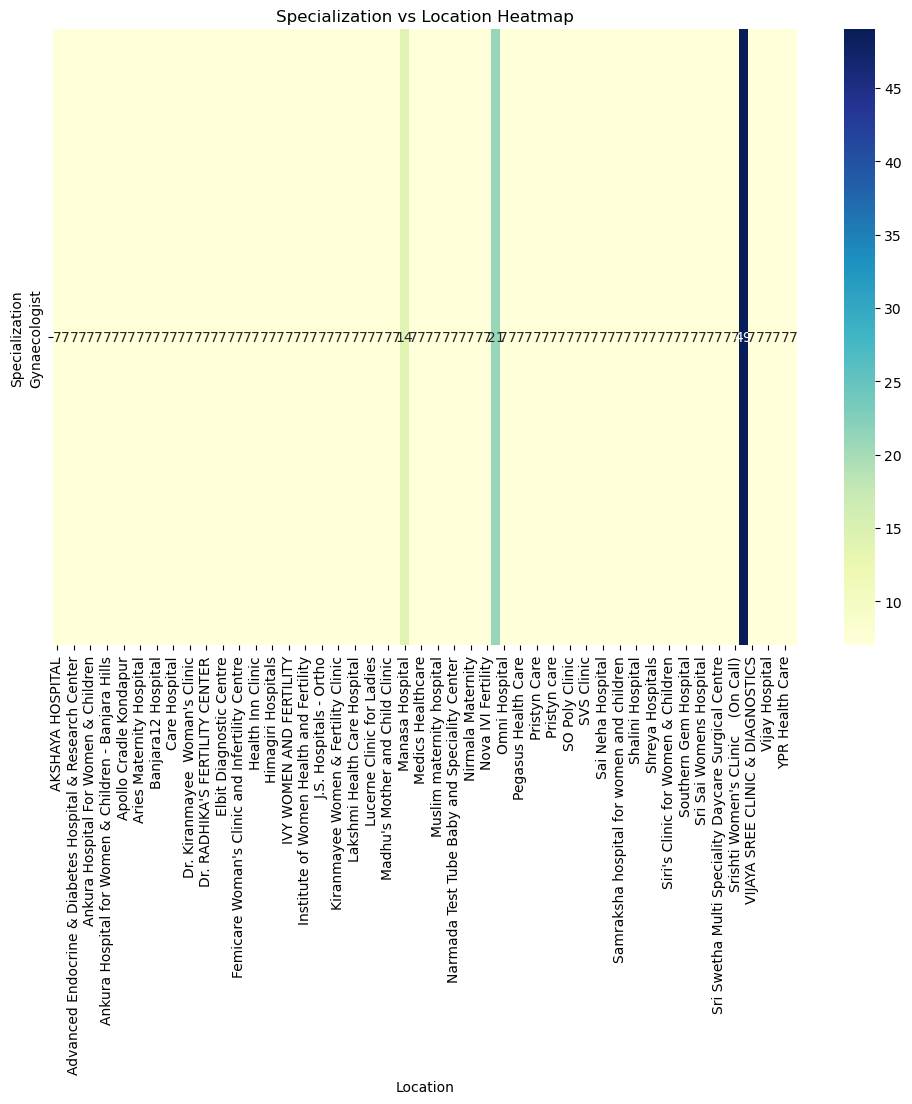

In [97]:
# Create availability counts DataFrame
availability_counts = pd.crosstab(df['Specialization'], df['Clinic Name'])

# Check if DataFrame is empty
if not availability_counts.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(availability_counts, cmap='YlGnBu', annot=True, fmt="d")
    plt.title('Specialization vs Location Heatmap')
    plt.xlabel('Location')
    plt.ylabel('Specialization')
    plt.show()
else:
    print("Availability counts DataFrame is empty.")

Data after conversion:
   Available From  Available Till
0               9              10
1              10              11
2              11              12
3              12              13

Availability Data (after dropping NaT):
   Available From  Available Till
0               9              10
1              10              11
2              11              12
3              12              13

Availability Counts:
Available Till  10  11  12  13
Available From                
9                1   0   0   0
10               0   1   0   0
11               0   0   1   0
12               0   0   0   1


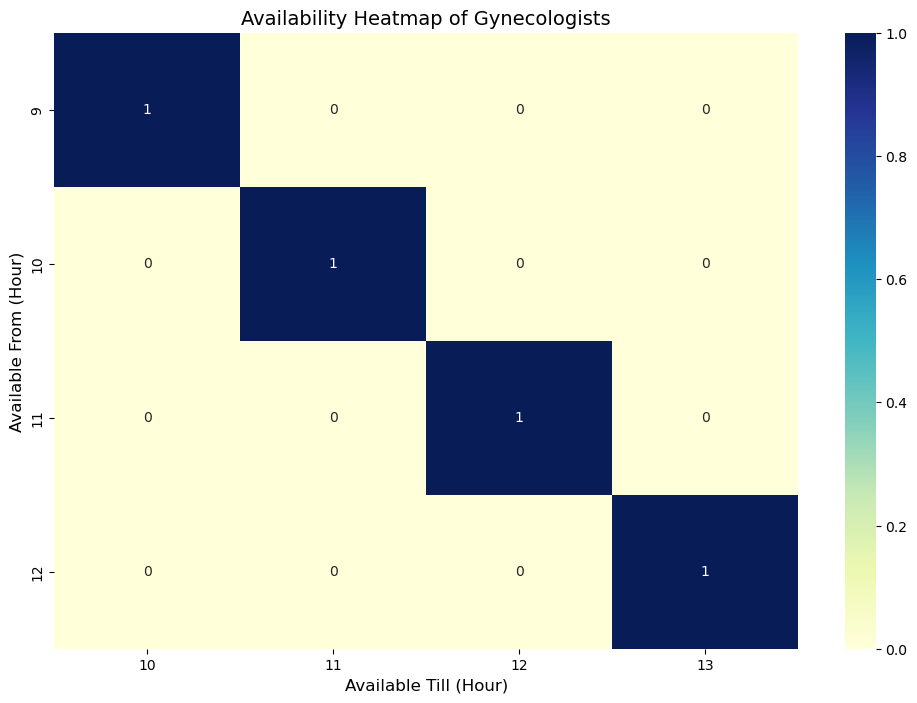

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (make sure to adjust the path if needed)
# df = pd.read_excel('path_to_your_file.xlsx')

# For demonstration purposes, let's simulate a small DataFrame
# You can comment out the below lines and uncomment the df loading line above
data = {
    'Available From': ['09:00', '10:00', '11:00', '12:00'],
    'Available Till': ['10:00', '11:00', '12:00', '13:00'],
}
df = pd.DataFrame(data)

# Convert 'Available From' and 'Available Till' to datetime
df['Available From'] = pd.to_datetime(df['Available From'], format='%H:%M', errors='coerce').dt.hour
df['Available Till'] = pd.to_datetime(df['Available Till'], format='%H:%M', errors='coerce').dt.hour

# Print the DataFrame after conversion to check values
print("Data after conversion:")
print(df)

# Check for null values and drop rows with NaT in either column
availability_data = df[['Available From', 'Available Till']].dropna()

# Print the availability data to verify content
print("\nAvailability Data (after dropping NaT):")
print(availability_data)

# Check if there are available data points for heatmap
if not availability_data.empty:
    # Create a DataFrame for heatmap
    availability_counts = availability_data.groupby(['Available From', 'Available Till']).size().unstack(fill_value=0)

    # Print the counts DataFrame for debugging
    print("\nAvailability Counts:")
    print(availability_counts)

    # Set up the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(availability_counts, cmap='YlGnBu', annot=True, fmt="d")

    # Add titles and labels
    plt.title('Availability Heatmap of Gynecologists', fontsize=14)
    plt.xlabel('Available Till (Hour)', fontsize=12)
    plt.ylabel('Available From (Hour)', fontsize=12)

    # Show the plot
    plt.show()
else:
    print("No valid availability data found for the heatmap.")